In [2]:
!pip3 install tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.2/213.2 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 8.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30681 sha256=27f5d81f44865564e796f4a601f3d9fdd7de6feac3e0e2bdf60a3ae7f74d5bc4
  Stored in directory: /Users/mnemosynthe/Library/Caches/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4832 sha256=ea5571e477d56d09bf696d3d1165ac1f1eb46440f8674af460ce1bf4291ee433
  Stored in directory: /Users/mnemosynthe/Library/Caches/pip/wheels/b6/0d/90/0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
  Created wheel for wrapt: filename=wrapt-1.12.1-cp39-cp39-macosx_10_9_x86_64.whl size=30811 sha256=1a8541aa1af5489c1d58111293ffc648072237c2429f75e7d6c4069fef74f43d
  Stored in directory: /Users/mnemosynthe/Library/Caches/pip/wheels/98/23/68/efe259aaca055e93b08e74fbe512819c69a2155c11ba3c0f10
Successfully built clang termcolor wrapt
  Attempting uninstall: wrap

# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [76]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

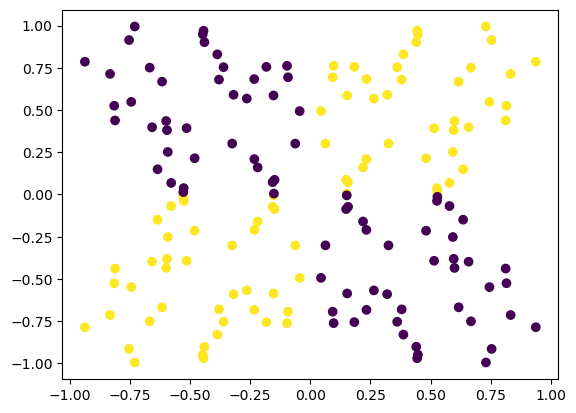

In [77]:
plt.scatter(*zip(*X), c=y)

In [99]:
num_layers = [1,2,3,4,5]
scores_2 = []
for num_layer in num_layers:
        
    # build model and evaluate
    model = Sequential()
    
    i = 0
    while i < num_layer:
        model.add(Dense(2, input_dim=2, activation='tanh'))
        print(num_layer)
        i = i + 1
        print(i)
        
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
   # print(model.predict(X).reshape(4*n))
        
    score = model.evaluate(X, y)
    scores_2.append(score)

1
1
Epoch 1/400
80/80 [==============================] - 0s 618us/step - loss: 2.8281
Epoch 2/400
80/80 [==============================] - 0s 605us/step - loss: 0.9165
Epoch 3/400
80/80 [==============================] - 0s 592us/step - loss: 0.7905
Epoch 4/400
80/80 [==============================] - 0s 594us/step - loss: 0.7604
Epoch 5/400
80/80 [==============================] - 0s 579us/step - loss: 0.7416
Epoch 6/400
80/80 [==============================] - 0s 577us/step - loss: 0.7295
Epoch 7/400
80/80 [==============================] - 0s 594us/step - loss: 0.7220
Epoch 8/400
80/80 [==============================] - 0s 585us/step - loss: 0.7158
Epoch 9/400
80/80 [==============================] - 0s 594us/step - loss: 0.7116
Epoch 10/400
80/80 [==============================] - 0s 572us/step - loss: 0.7084
Epoch 11/400
80/80 [==============================] - 0s 573us/step - loss: 0.7057
Epoch 12/400
80/80 [==============================] - 0s 572us/step - loss: 0.7039
Epoch 13/

80/80 [==============================] - 0s 583us/step - loss: 0.6969
Epoch 100/400
80/80 [==============================] - 0s 589us/step - loss: 0.6975
Epoch 101/400
80/80 [==============================] - 0s 575us/step - loss: 0.6971
Epoch 102/400
80/80 [==============================] - 0s 565us/step - loss: 0.6974
Epoch 103/400
80/80 [==============================] - 0s 565us/step - loss: 0.6986
Epoch 104/400
80/80 [==============================] - 0s 554us/step - loss: 0.6975
Epoch 105/400
80/80 [==============================] - 0s 563us/step - loss: 0.6965
Epoch 106/400
80/80 [==============================] - 0s 567us/step - loss: 0.6977
Epoch 107/400
80/80 [==============================] - 0s 555us/step - loss: 0.6975
Epoch 108/400
80/80 [==============================] - 0s 580us/step - loss: 0.6948
Epoch 109/400
80/80 [==============================] - 0s 602us/step - loss: 0.6977
Epoch 110/400
80/80 [==============================] - 0s 623us/step - loss: 0.6972
Epoch 

80/80 [==============================] - 0s 592us/step - loss: 0.6973
Epoch 197/400
80/80 [==============================] - 0s 589us/step - loss: 0.6970
Epoch 198/400
80/80 [==============================] - 0s 566us/step - loss: 0.6979
Epoch 199/400
80/80 [==============================] - 0s 562us/step - loss: 0.6967
Epoch 200/400
80/80 [==============================] - 0s 562us/step - loss: 0.6977
Epoch 201/400
80/80 [==============================] - 0s 564us/step - loss: 0.6974
Epoch 202/400
80/80 [==============================] - 0s 556us/step - loss: 0.6971
Epoch 203/400
80/80 [==============================] - 0s 555us/step - loss: 0.6980
Epoch 204/400
80/80 [==============================] - 0s 572us/step - loss: 0.6970
Epoch 205/400
80/80 [==============================] - 0s 622us/step - loss: 0.6976
Epoch 206/400
80/80 [==============================] - 0s 563us/step - loss: 0.6970
Epoch 207/400
80/80 [==============================] - 0s 569us/step - loss: 0.6977
Epoch 

80/80 [==============================] - 0s 543us/step - loss: 0.6975
Epoch 294/400
80/80 [==============================] - 0s 542us/step - loss: 0.6972
Epoch 295/400
80/80 [==============================] - 0s 554us/step - loss: 0.6968
Epoch 296/400
80/80 [==============================] - 0s 555us/step - loss: 0.6966
Epoch 297/400
80/80 [==============================] - 0s 578us/step - loss: 0.6969
Epoch 298/400
80/80 [==============================] - 0s 562us/step - loss: 0.6967
Epoch 299/400
80/80 [==============================] - 0s 558us/step - loss: 0.6964
Epoch 300/400
80/80 [==============================] - 0s 559us/step - loss: 0.6972
Epoch 301/400
80/80 [==============================] - 0s 561us/step - loss: 0.6970
Epoch 302/400
80/80 [==============================] - 0s 565us/step - loss: 0.6959
Epoch 303/400
80/80 [==============================] - 0s 561us/step - loss: 0.6978
Epoch 304/400
80/80 [==============================] - 0s 550us/step - loss: 0.6963
Epoch 

80/80 [==============================] - 0s 583us/step - loss: 0.6970
Epoch 391/400
80/80 [==============================] - 0s 570us/step - loss: 0.6968
Epoch 392/400
80/80 [==============================] - 0s 551us/step - loss: 0.6974
Epoch 393/400
80/80 [==============================] - 0s 547us/step - loss: 0.6974
Epoch 394/400
80/80 [==============================] - 0s 559us/step - loss: 0.6969
Epoch 395/400
80/80 [==============================] - 0s 555us/step - loss: 0.6971
Epoch 396/400
80/80 [==============================] - 0s 553us/step - loss: 0.6970
Epoch 397/400
80/80 [==============================] - 0s 548us/step - loss: 0.6979
Epoch 398/400
80/80 [==============================] - 0s 558us/step - loss: 0.6975
Epoch 399/400
80/80 [==============================] - 0s 554us/step - loss: 0.6971
Epoch 400/400
5/5 [==============================] - 0s 889us/step - loss: 0.6932
2
1
2
2
Epoch 1/400
80/80 [==============================] - 0s 631us/step - loss: 1.6384
Ep

Epoch 88/400
80/80 [==============================] - 0s 582us/step - loss: 0.3063
Epoch 89/400
80/80 [==============================] - 0s 595us/step - loss: 0.3058
Epoch 90/400
80/80 [==============================] - 0s 576us/step - loss: 0.3044
Epoch 91/400
80/80 [==============================] - 0s 552us/step - loss: 0.3068
Epoch 92/400
80/80 [==============================] - 0s 537us/step - loss: 0.3057
Epoch 93/400
80/80 [==============================] - 0s 545us/step - loss: 0.3051
Epoch 94/400
80/80 [==============================] - 0s 584us/step - loss: 0.3056
Epoch 95/400
80/80 [==============================] - 0s 594us/step - loss: 0.3067
Epoch 96/400
80/80 [==============================] - 0s 583us/step - loss: 0.3048
Epoch 97/400
80/80 [==============================] - 0s 588us/step - loss: 0.3064
Epoch 98/400
80/80 [==============================] - 0s 589us/step - loss: 0.3062
Epoch 99/400
80/80 [==============================] - 0s 588us/step - loss: 0.3051
Epoc

80/80 [==============================] - 0s 570us/step - loss: 0.3001
Epoch 186/400
80/80 [==============================] - 0s 596us/step - loss: 0.3011
Epoch 187/400
80/80 [==============================] - 0s 581us/step - loss: 0.3019
Epoch 188/400
80/80 [==============================] - 0s 599us/step - loss: 0.3012
Epoch 189/400
80/80 [==============================] - 0s 582us/step - loss: 0.3013
Epoch 190/400
80/80 [==============================] - 0s 581us/step - loss: 0.3014
Epoch 191/400
80/80 [==============================] - 0s 584us/step - loss: 0.3012
Epoch 192/400
80/80 [==============================] - 0s 587us/step - loss: 0.3016
Epoch 193/400
80/80 [==============================] - 0s 546us/step - loss: 0.3017
Epoch 194/400
80/80 [==============================] - 0s 581us/step - loss: 0.3006
Epoch 195/400
80/80 [==============================] - 0s 576us/step - loss: 0.3017
Epoch 196/400
80/80 [==============================] - 0s 595us/step - loss: 0.3012
Epoch 

80/80 [==============================] - 0s 590us/step - loss: 0.2995
Epoch 283/400
80/80 [==============================] - 0s 582us/step - loss: 0.2992
Epoch 284/400
80/80 [==============================] - 0s 596us/step - loss: 0.2991
Epoch 285/400
80/80 [==============================] - 0s 571us/step - loss: 0.2985
Epoch 286/400
80/80 [==============================] - 0s 585us/step - loss: 0.2987
Epoch 287/400
80/80 [==============================] - 0s 585us/step - loss: 0.2986
Epoch 288/400
80/80 [==============================] - 0s 584us/step - loss: 0.2990
Epoch 289/400
80/80 [==============================] - 0s 577us/step - loss: 0.2995
Epoch 290/400
80/80 [==============================] - 0s 588us/step - loss: 0.2985
Epoch 291/400
80/80 [==============================] - 0s 578us/step - loss: 0.2993
Epoch 292/400
80/80 [==============================] - 0s 576us/step - loss: 0.2984
Epoch 293/400
80/80 [==============================] - 0s 566us/step - loss: 0.2981
Epoch 

80/80 [==============================] - 0s 585us/step - loss: 0.2965
Epoch 380/400
80/80 [==============================] - 0s 605us/step - loss: 0.2972
Epoch 381/400
80/80 [==============================] - 0s 594us/step - loss: 0.2972
Epoch 382/400
80/80 [==============================] - 0s 584us/step - loss: 0.2964
Epoch 383/400
80/80 [==============================] - 0s 579us/step - loss: 0.2963
Epoch 384/400
80/80 [==============================] - 0s 579us/step - loss: 0.2963
Epoch 385/400
80/80 [==============================] - 0s 570us/step - loss: 0.2977
Epoch 386/400
80/80 [==============================] - 0s 573us/step - loss: 0.2965
Epoch 387/400
80/80 [==============================] - 0s 579us/step - loss: 0.2963
Epoch 388/400
80/80 [==============================] - 0s 581us/step - loss: 0.2969
Epoch 389/400
80/80 [==============================] - 0s 575us/step - loss: 0.2968
Epoch 390/400
80/80 [==============================] - 0s 575us/step - loss: 0.2969
Epoch 

80/80 [==============================] - 0s 596us/step - loss: 0.3051
Epoch 77/400
80/80 [==============================] - 0s 612us/step - loss: 0.2995
Epoch 78/400
80/80 [==============================] - 0s 613us/step - loss: 0.3062
Epoch 79/400
80/80 [==============================] - 0s 611us/step - loss: 0.3009
Epoch 80/400
80/80 [==============================] - 0s 610us/step - loss: 0.3043
Epoch 81/400
80/80 [==============================] - 0s 607us/step - loss: 0.3023
Epoch 82/400
80/80 [==============================] - 0s 619us/step - loss: 0.3055
Epoch 83/400
80/80 [==============================] - 0s 600us/step - loss: 0.3019
Epoch 84/400
80/80 [==============================] - 0s 606us/step - loss: 0.3027
Epoch 85/400
80/80 [==============================] - 0s 610us/step - loss: 0.3016
Epoch 86/400
80/80 [==============================] - 0s 599us/step - loss: 0.2983
Epoch 87/400
80/80 [==============================] - 0s 601us/step - loss: 0.2996
Epoch 88/400
80/8

Epoch 174/400
80/80 [==============================] - 0s 619us/step - loss: 0.2958
Epoch 175/400
80/80 [==============================] - 0s 596us/step - loss: 0.2947
Epoch 176/400
80/80 [==============================] - 0s 610us/step - loss: 0.2976
Epoch 177/400
80/80 [==============================] - 0s 609us/step - loss: 0.2957
Epoch 178/400
80/80 [==============================] - 0s 606us/step - loss: 0.2954
Epoch 179/400
80/80 [==============================] - 0s 602us/step - loss: 0.2960
Epoch 180/400
80/80 [==============================] - 0s 597us/step - loss: 0.2959
Epoch 181/400
80/80 [==============================] - 0s 607us/step - loss: 0.2975
Epoch 182/400
80/80 [==============================] - 0s 619us/step - loss: 0.2957
Epoch 183/400
80/80 [==============================] - 0s 572us/step - loss: 0.2953
Epoch 184/400
80/80 [==============================] - 0s 562us/step - loss: 0.2962
Epoch 185/400
80/80 [==============================] - 0s 554us/step - loss:

80/80 [==============================] - 0s 612us/step - loss: 0.2951
Epoch 272/400
80/80 [==============================] - 0s 646us/step - loss: 0.2837
Epoch 273/400
80/80 [==============================] - 0s 580us/step - loss: 0.2965
Epoch 274/400
80/80 [==============================] - 0s 618us/step - loss: 0.2926
Epoch 275/400
80/80 [==============================] - 0s 607us/step - loss: 0.2952
Epoch 276/400
80/80 [==============================] - 0s 613us/step - loss: 0.2925
Epoch 277/400
80/80 [==============================] - 0s 610us/step - loss: 0.2931
Epoch 278/400
80/80 [==============================] - 0s 568us/step - loss: 0.2894
Epoch 279/400
80/80 [==============================] - 0s 561us/step - loss: 0.2943
Epoch 280/400
80/80 [==============================] - 0s 547us/step - loss: 0.2899
Epoch 281/400
80/80 [==============================] - 0s 563us/step - loss: 0.2983
Epoch 282/400
80/80 [==============================] - 0s 565us/step - loss: 0.2915
Epoch 

80/80 [==============================] - 0s 611us/step - loss: 0.2916
Epoch 369/400
80/80 [==============================] - 0s 625us/step - loss: 0.2920
Epoch 370/400
80/80 [==============================] - 0s 616us/step - loss: 0.2892
Epoch 371/400
80/80 [==============================] - 0s 601us/step - loss: 0.2912
Epoch 372/400
80/80 [==============================] - 0s 603us/step - loss: 0.2930
Epoch 373/400
80/80 [==============================] - 0s 609us/step - loss: 0.2911
Epoch 374/400
80/80 [==============================] - 0s 618us/step - loss: 0.2902
Epoch 375/400
80/80 [==============================] - 0s 621us/step - loss: 0.2895
Epoch 376/400
80/80 [==============================] - 0s 611us/step - loss: 0.2914
Epoch 377/400
80/80 [==============================] - 0s 595us/step - loss: 0.2898
Epoch 378/400
80/80 [==============================] - 0s 596us/step - loss: 0.2906
Epoch 379/400
80/80 [==============================] - 0s 618us/step - loss: 0.2918
Epoch 

80/80 [==============================] - 0s 671us/step - loss: 0.0752
Epoch 66/400
80/80 [==============================] - 0s 661us/step - loss: 0.0739
Epoch 67/400
80/80 [==============================] - 0s 656us/step - loss: 0.0735
Epoch 68/400
80/80 [==============================] - 0s 681us/step - loss: 0.0682
Epoch 69/400
80/80 [==============================] - 0s 653us/step - loss: 0.0715
Epoch 70/400
80/80 [==============================] - 0s 661us/step - loss: 0.0674
Epoch 71/400
80/80 [==============================] - 0s 652us/step - loss: 0.0828
Epoch 72/400
80/80 [==============================] - 0s 677us/step - loss: 0.0683
Epoch 73/400
80/80 [==============================] - 0s 658us/step - loss: 0.0698
Epoch 74/400
80/80 [==============================] - 0s 670us/step - loss: 0.0657
Epoch 75/400
80/80 [==============================] - 0s 668us/step - loss: 0.0606
Epoch 76/400
80/80 [==============================] - 0s 666us/step - loss: 0.0622
Epoch 77/400
80/8

80/80 [==============================] - 0s 630us/step - loss: 0.0466
Epoch 164/400
80/80 [==============================] - 0s 625us/step - loss: 0.0368
Epoch 165/400
80/80 [==============================] - 0s 620us/step - loss: 0.0317
Epoch 166/400
80/80 [==============================] - 0s 657us/step - loss: 0.0477
Epoch 167/400
80/80 [==============================] - 0s 626us/step - loss: 0.0417
Epoch 168/400
80/80 [==============================] - 0s 610us/step - loss: 0.0493
Epoch 169/400
80/80 [==============================] - 0s 615us/step - loss: 0.0328
Epoch 170/400
80/80 [==============================] - 0s 595us/step - loss: 0.0450
Epoch 171/400
80/80 [==============================] - 0s 601us/step - loss: 0.0346
Epoch 172/400
80/80 [==============================] - 0s 623us/step - loss: 0.0376
Epoch 173/400
80/80 [==============================] - 0s 719us/step - loss: 0.0497
Epoch 174/400
80/80 [==============================] - 0s 609us/step - loss: 0.0381
Epoch 

80/80 [==============================] - 0s 715us/step - loss: 0.0394
Epoch 261/400
80/80 [==============================] - 0s 600us/step - loss: 0.0340
Epoch 262/400
80/80 [==============================] - 0s 612us/step - loss: 0.0346
Epoch 263/400
80/80 [==============================] - 0s 627us/step - loss: 0.0318
Epoch 264/400
80/80 [==============================] - 0s 622us/step - loss: 0.0337
Epoch 265/400
80/80 [==============================] - 0s 580us/step - loss: 0.0320
Epoch 266/400
80/80 [==============================] - 0s 627us/step - loss: 0.0372
Epoch 267/400
80/80 [==============================] - 0s 613us/step - loss: 0.0311
Epoch 268/400
80/80 [==============================] - 0s 629us/step - loss: 0.0291
Epoch 269/400
80/80 [==============================] - 0s 617us/step - loss: 0.0389
Epoch 270/400
80/80 [==============================] - 0s 582us/step - loss: 0.0289
Epoch 271/400
80/80 [==============================] - 0s 631us/step - loss: 0.0382
Epoch 

80/80 [==============================] - 0s 618us/step - loss: 0.5344
Epoch 358/400
80/80 [==============================] - 0s 629us/step - loss: 0.5356
Epoch 359/400
80/80 [==============================] - 0s 598us/step - loss: 0.5332
Epoch 360/400
80/80 [==============================] - 0s 608us/step - loss: 0.5344
Epoch 361/400
80/80 [==============================] - 0s 603us/step - loss: 0.5329
Epoch 362/400
80/80 [==============================] - 0s 615us/step - loss: 0.5344
Epoch 363/400
80/80 [==============================] - 0s 615us/step - loss: 0.5336
Epoch 364/400
80/80 [==============================] - 0s 619us/step - loss: 0.5308
Epoch 365/400
80/80 [==============================] - 0s 611us/step - loss: 0.5279
Epoch 366/400
80/80 [==============================] - 0s 604us/step - loss: 0.5304
Epoch 367/400
80/80 [==============================] - 0s 633us/step - loss: 0.5301
Epoch 368/400
80/80 [==============================] - 0s 646us/step - loss: 0.5278
Epoch 

80/80 [==============================] - 0s 672us/step - loss: 0.5703
Epoch 55/400
80/80 [==============================] - 0s 653us/step - loss: 0.5652
Epoch 56/400
80/80 [==============================] - 0s 607us/step - loss: 0.5651
Epoch 57/400
80/80 [==============================] - 0s 668us/step - loss: 0.5631
Epoch 58/400
80/80 [==============================] - 0s 711us/step - loss: 0.5622
Epoch 59/400
80/80 [==============================] - 0s 672us/step - loss: 0.5633
Epoch 60/400
80/80 [==============================] - 0s 668us/step - loss: 0.5614
Epoch 61/400
80/80 [==============================] - 0s 665us/step - loss: 0.5563
Epoch 62/400
80/80 [==============================] - 0s 627us/step - loss: 0.5590
Epoch 63/400
80/80 [==============================] - 0s 646us/step - loss: 0.5579
Epoch 64/400
80/80 [==============================] - 0s 651us/step - loss: 0.5584
Epoch 65/400
80/80 [==============================] - 0s 634us/step - loss: 0.5514
Epoch 66/400
80/8

80/80 [==============================] - 0s 663us/step - loss: 0.3465
Epoch 153/400
80/80 [==============================] - 0s 657us/step - loss: 0.3330
Epoch 154/400
80/80 [==============================] - 0s 649us/step - loss: 0.4502
Epoch 155/400
80/80 [==============================] - 0s 656us/step - loss: 0.7282
Epoch 156/400
80/80 [==============================] - 0s 653us/step - loss: 0.3892
Epoch 157/400
80/80 [==============================] - 0s 648us/step - loss: 0.3339
Epoch 158/400
80/80 [==============================] - 0s 656us/step - loss: 0.3140
Epoch 159/400
80/80 [==============================] - 0s 662us/step - loss: 0.3438
Epoch 160/400
80/80 [==============================] - 0s 631us/step - loss: 0.2944
Epoch 161/400
80/80 [==============================] - 0s 649us/step - loss: 0.2523
Epoch 162/400
80/80 [==============================] - 0s 657us/step - loss: 0.2514
Epoch 163/400
80/80 [==============================] - 0s 695us/step - loss: 0.2428
Epoch 

80/80 [==============================] - 0s 663us/step - loss: 0.1632
Epoch 250/400
80/80 [==============================] - 0s 644us/step - loss: 0.0723
Epoch 251/400
80/80 [==============================] - 0s 604us/step - loss: 0.0622
Epoch 252/400
80/80 [==============================] - 0s 655us/step - loss: 0.0839
Epoch 253/400
80/80 [==============================] - 0s 658us/step - loss: 0.0673
Epoch 254/400
80/80 [==============================] - 0s 749us/step - loss: 0.0695
Epoch 255/400
80/80 [==============================] - 0s 713us/step - loss: 0.0625
Epoch 256/400
80/80 [==============================] - 0s 694us/step - loss: 0.0669
Epoch 257/400
80/80 [==============================] - 0s 708us/step - loss: 0.0610
Epoch 258/400
80/80 [==============================] - 0s 750us/step - loss: 0.0590
Epoch 259/400
80/80 [==============================] - 0s 704us/step - loss: 0.0728
Epoch 260/400
80/80 [==============================] - 0s 692us/step - loss: 0.0657
Epoch 

80/80 [==============================] - 0s 656us/step - loss: 0.0506
Epoch 347/400
80/80 [==============================] - 0s 704us/step - loss: 0.0449
Epoch 348/400
80/80 [==============================] - 0s 678us/step - loss: 0.0541
Epoch 349/400
80/80 [==============================] - 0s 706us/step - loss: 0.0385
Epoch 350/400
80/80 [==============================] - 0s 653us/step - loss: 0.0480
Epoch 351/400
80/80 [==============================] - 0s 663us/step - loss: 0.0396
Epoch 352/400
80/80 [==============================] - 0s 626us/step - loss: 0.0522
Epoch 353/400
80/80 [==============================] - 0s 648us/step - loss: 0.0377
Epoch 354/400
80/80 [==============================] - 0s 657us/step - loss: 0.0403
Epoch 355/400
80/80 [==============================] - 0s 658us/step - loss: 0.0470
Epoch 356/400
80/80 [==============================] - 0s 657us/step - loss: 0.0366
Epoch 357/400
80/80 [==============================] - 0s 653us/step - loss: 0.0547
Epoch 

In [101]:
# plot scores
scores_2

[0.6932004690170288,
 0.2923211455345154,
 0.2850715219974518,
 0.47642287611961365,
 0.026195410639047623]

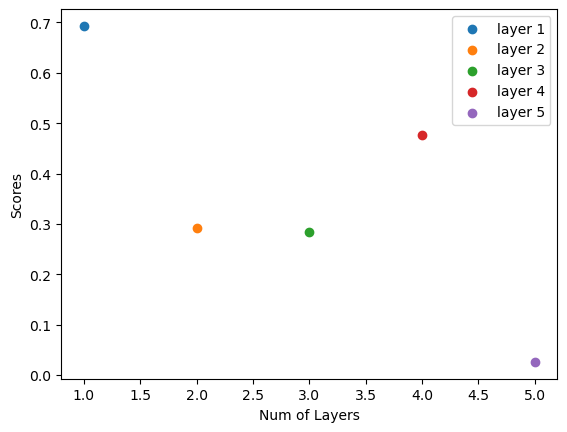

In [102]:
plt.figure()
plt.scatter(num_layers[0], scores_2[0], label='layer 1')
plt.scatter(num_layers[1], scores_2[1], label='layer 2')
plt.scatter(num_layers[2], scores_2[2], label='layer 3')
plt.scatter(num_layers[3], scores_2[3], label='layer 4')
plt.scatter(num_layers[4], scores_2[4], label='layer 5')
plt.xlabel("Num of Layers")
plt.ylabel("Scores")
plt.legend()

In [97]:
# 3 neurons
num_layers = [1,2,3,4,5]
scores_3 = []
for num_layer in num_layers:
        
    # build model and evaluate
    model = Sequential()
    
    i = 0
    while i < num_layer:
        model.add(Dense(3, input_dim=2, activation='tanh'))
        print(num_layer)
        i = i + 1
        print(i)
        
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
   # print(model.predict(X).reshape(4*n))
        
    score = model.evaluate(X, y)
    scores_3.append(score)

1
1
Epoch 1/400
80/80 [==============================] - 0s 599us/step - loss: 3.0586
Epoch 2/400
80/80 [==============================] - 0s 592us/step - loss: 2.3391
Epoch 3/400
80/80 [==============================] - 0s 588us/step - loss: 1.8585
Epoch 4/400
80/80 [==============================] - 0s 588us/step - loss: 1.8476
Epoch 5/400
80/80 [==============================] - 0s 581us/step - loss: 1.8399
Epoch 6/400
80/80 [==============================] - 0s 587us/step - loss: 1.8344
Epoch 7/400
80/80 [==============================] - 0s 579us/step - loss: 1.8310
Epoch 8/400
80/80 [==============================] - 0s 587us/step - loss: 1.8283
Epoch 9/400
80/80 [==============================] - 0s 567us/step - loss: 1.8265
Epoch 10/400
80/80 [==============================] - 0s 618us/step - loss: 1.8246
Epoch 11/400
80/80 [==============================] - 0s 594us/step - loss: 1.8230
Epoch 12/400
80/80 [==============================] - 0s 599us/step - loss: 1.8221
Epoch 13/

80/80 [==============================] - 0s 565us/step - loss: 1.8112
Epoch 100/400
80/80 [==============================] - 0s 620us/step - loss: 1.8117
Epoch 101/400
80/80 [==============================] - 0s 590us/step - loss: 1.8120
Epoch 102/400
80/80 [==============================] - 0s 559us/step - loss: 1.8114
Epoch 103/400
80/80 [==============================] - 0s 546us/step - loss: 1.8114
Epoch 104/400
80/80 [==============================] - 0s 560us/step - loss: 1.8117
Epoch 105/400
80/80 [==============================] - 0s 560us/step - loss: 1.8116
Epoch 106/400
80/80 [==============================] - 0s 552us/step - loss: 1.8114
Epoch 107/400
80/80 [==============================] - 0s 564us/step - loss: 1.8116
Epoch 108/400
80/80 [==============================] - 0s 576us/step - loss: 1.8114
Epoch 109/400
80/80 [==============================] - 0s 587us/step - loss: 1.8114
Epoch 110/400
80/80 [==============================] - 0s 592us/step - loss: 1.8117
Epoch 

80/80 [==============================] - 0s 559us/step - loss: 1.8113
Epoch 197/400
80/80 [==============================] - 0s 569us/step - loss: 1.8111
Epoch 198/400
80/80 [==============================] - 0s 570us/step - loss: 1.8113
Epoch 199/400
80/80 [==============================] - 0s 575us/step - loss: 1.8110
Epoch 200/400
80/80 [==============================] - 0s 556us/step - loss: 1.8109
Epoch 201/400
80/80 [==============================] - 0s 548us/step - loss: 1.8115
Epoch 202/400
80/80 [==============================] - 0s 542us/step - loss: 1.8112
Epoch 203/400
80/80 [==============================] - 0s 544us/step - loss: 1.8110
Epoch 204/400
80/80 [==============================] - 0s 559us/step - loss: 1.8106
Epoch 205/400
80/80 [==============================] - 0s 555us/step - loss: 1.8112
Epoch 206/400
80/80 [==============================] - 0s 548us/step - loss: 1.8112
Epoch 207/400
80/80 [==============================] - 0s 563us/step - loss: 1.8109
Epoch 

80/80 [==============================] - 0s 610us/step - loss: 1.8111
Epoch 294/400
80/80 [==============================] - 0s 572us/step - loss: 1.8109
Epoch 295/400
80/80 [==============================] - 0s 569us/step - loss: 1.8106
Epoch 296/400
80/80 [==============================] - 0s 545us/step - loss: 1.8107
Epoch 297/400
80/80 [==============================] - 0s 539us/step - loss: 1.8111
Epoch 298/400
80/80 [==============================] - 0s 559us/step - loss: 1.8109
Epoch 299/400
80/80 [==============================] - 0s 549us/step - loss: 1.8105
Epoch 300/400
80/80 [==============================] - 0s 537us/step - loss: 1.8109
Epoch 301/400
80/80 [==============================] - 0s 548us/step - loss: 1.8108
Epoch 302/400
80/80 [==============================] - 0s 553us/step - loss: 1.8107
Epoch 303/400
80/80 [==============================] - 0s 542us/step - loss: 1.8108
Epoch 304/400
80/80 [==============================] - 0s 546us/step - loss: 1.8107
Epoch 

80/80 [==============================] - 0s 558us/step - loss: 1.8111
Epoch 391/400
80/80 [==============================] - 0s 560us/step - loss: 1.8105
Epoch 392/400
80/80 [==============================] - 0s 536us/step - loss: 1.8109
Epoch 393/400
80/80 [==============================] - 0s 551us/step - loss: 1.8108
Epoch 394/400
80/80 [==============================] - 0s 546us/step - loss: 1.8109
Epoch 395/400
80/80 [==============================] - 0s 547us/step - loss: 1.8109
Epoch 396/400
80/80 [==============================] - 0s 552us/step - loss: 1.8108
Epoch 397/400
80/80 [==============================] - 0s 548us/step - loss: 1.8108
Epoch 398/400
80/80 [==============================] - 0s 538us/step - loss: 1.8110
Epoch 399/400
80/80 [==============================] - 0s 548us/step - loss: 1.8107
Epoch 400/400
5/5 [==============================] - 0s 848us/step - loss: 1.8084
2
1
2
2
Epoch 1/400
80/80 [==============================] - 0s 609us/step - loss: 3.3994
Ep

Epoch 88/400
80/80 [==============================] - 0s 581us/step - loss: 0.2349
Epoch 89/400
80/80 [==============================] - 0s 591us/step - loss: 0.2331
Epoch 90/400
80/80 [==============================] - 0s 569us/step - loss: 0.2307
Epoch 91/400
80/80 [==============================] - 0s 565us/step - loss: 0.2277
Epoch 92/400
80/80 [==============================] - 0s 612us/step - loss: 0.2280
Epoch 93/400
80/80 [==============================] - 0s 597us/step - loss: 0.2267
Epoch 94/400
80/80 [==============================] - 0s 578us/step - loss: 0.2251
Epoch 95/400
80/80 [==============================] - 0s 580us/step - loss: 0.2238
Epoch 96/400
80/80 [==============================] - 0s 652us/step - loss: 0.2225
Epoch 97/400
80/80 [==============================] - 0s 606us/step - loss: 0.2205
Epoch 98/400
80/80 [==============================] - 0s 583us/step - loss: 0.2193
Epoch 99/400
80/80 [==============================] - 0s 608us/step - loss: 0.2197
Epoc

80/80 [==============================] - 0s 577us/step - loss: 0.1632
Epoch 186/400
80/80 [==============================] - 0s 574us/step - loss: 0.1669
Epoch 187/400
80/80 [==============================] - 0s 583us/step - loss: 0.1639
Epoch 188/400
80/80 [==============================] - 0s 578us/step - loss: 0.1647
Epoch 189/400
80/80 [==============================] - 0s 567us/step - loss: 0.1637
Epoch 190/400
80/80 [==============================] - 0s 577us/step - loss: 0.1657
Epoch 191/400
80/80 [==============================] - 0s 540us/step - loss: 0.1649
Epoch 192/400
80/80 [==============================] - 0s 563us/step - loss: 0.1640
Epoch 193/400
80/80 [==============================] - 0s 575us/step - loss: 0.1645
Epoch 194/400
80/80 [==============================] - 0s 580us/step - loss: 0.1650
Epoch 195/400
80/80 [==============================] - 0s 582us/step - loss: 0.1606
Epoch 196/400
80/80 [==============================] - 0s 578us/step - loss: 0.1624
Epoch 

80/80 [==============================] - 0s 602us/step - loss: 0.1444
Epoch 283/400
80/80 [==============================] - 0s 664us/step - loss: 0.1463
Epoch 284/400
80/80 [==============================] - 0s 623us/step - loss: 0.1458
Epoch 285/400
80/80 [==============================] - 0s 621us/step - loss: 0.1466
Epoch 286/400
80/80 [==============================] - 0s 603us/step - loss: 0.1457
Epoch 287/400
80/80 [==============================] - 0s 576us/step - loss: 0.1456
Epoch 288/400
80/80 [==============================] - 0s 549us/step - loss: 0.1455
Epoch 289/400
80/80 [==============================] - 0s 557us/step - loss: 0.1451
Epoch 290/400
80/80 [==============================] - 0s 582us/step - loss: 0.1458
Epoch 291/400
80/80 [==============================] - 0s 598us/step - loss: 0.1452
Epoch 292/400
80/80 [==============================] - 0s 606us/step - loss: 0.1452
Epoch 293/400
80/80 [==============================] - 0s 626us/step - loss: 0.1448
Epoch 

80/80 [==============================] - 0s 577us/step - loss: 0.1384
Epoch 380/400
80/80 [==============================] - 0s 591us/step - loss: 0.1383
Epoch 381/400
80/80 [==============================] - 0s 573us/step - loss: 0.1366
Epoch 382/400
80/80 [==============================] - 0s 595us/step - loss: 0.1373
Epoch 383/400
80/80 [==============================] - 0s 585us/step - loss: 0.1381
Epoch 384/400
80/80 [==============================] - 0s 598us/step - loss: 0.1361
Epoch 385/400
80/80 [==============================] - 0s 579us/step - loss: 0.1367
Epoch 386/400
80/80 [==============================] - 0s 585us/step - loss: 0.1366
Epoch 387/400
80/80 [==============================] - 0s 575us/step - loss: 0.1346
Epoch 388/400
80/80 [==============================] - 0s 568us/step - loss: 0.1336
Epoch 389/400
80/80 [==============================] - 0s 596us/step - loss: 0.1372
Epoch 390/400
80/80 [==============================] - 0s 590us/step - loss: 0.1374
Epoch 

80/80 [==============================] - 0s 607us/step - loss: 2.9559
Epoch 77/400
80/80 [==============================] - 0s 631us/step - loss: 2.9566
Epoch 78/400
80/80 [==============================] - 0s 617us/step - loss: 2.9562
Epoch 79/400
80/80 [==============================] - 0s 594us/step - loss: 2.9555
Epoch 80/400
80/80 [==============================] - 0s 612us/step - loss: 2.9549
Epoch 81/400
80/80 [==============================] - 0s 628us/step - loss: 2.9549
Epoch 82/400
80/80 [==============================] - 0s 669us/step - loss: 2.9544
Epoch 83/400
80/80 [==============================] - 0s 646us/step - loss: 2.9536
Epoch 84/400
80/80 [==============================] - 0s 654us/step - loss: 2.9532
Epoch 85/400
80/80 [==============================] - 0s 632us/step - loss: 2.9533
Epoch 86/400
80/80 [==============================] - 0s 584us/step - loss: 2.9538
Epoch 87/400
80/80 [==============================] - 0s 618us/step - loss: 2.9533
Epoch 88/400
80/8

Epoch 174/400
80/80 [==============================] - 0s 572us/step - loss: 2.9369
Epoch 175/400
80/80 [==============================] - 0s 565us/step - loss: 2.9372
Epoch 176/400
80/80 [==============================] - 0s 604us/step - loss: 2.9359
Epoch 177/400
80/80 [==============================] - 0s 604us/step - loss: 2.9364
Epoch 178/400
80/80 [==============================] - 0s 603us/step - loss: 2.9357
Epoch 179/400
80/80 [==============================] - 0s 615us/step - loss: 2.9357
Epoch 180/400
80/80 [==============================] - 0s 610us/step - loss: 2.9362
Epoch 181/400
80/80 [==============================] - 0s 558us/step - loss: 2.9346
Epoch 182/400
80/80 [==============================] - 0s 571us/step - loss: 2.9344
Epoch 183/400
80/80 [==============================] - 0s 598us/step - loss: 2.9343
Epoch 184/400
80/80 [==============================] - 0s 610us/step - loss: 2.9333
Epoch 185/400
80/80 [==============================] - 0s 614us/step - loss:

80/80 [==============================] - 0s 581us/step - loss: 2.7740
Epoch 272/400
80/80 [==============================] - 0s 563us/step - loss: 2.7758
Epoch 273/400
80/80 [==============================] - 0s 597us/step - loss: 2.7733
Epoch 274/400
80/80 [==============================] - 0s 588us/step - loss: 2.7741
Epoch 275/400
80/80 [==============================] - 0s 617us/step - loss: 2.7766
Epoch 276/400
80/80 [==============================] - 0s 613us/step - loss: 2.7753
Epoch 277/400
80/80 [==============================] - 0s 621us/step - loss: 2.7752
Epoch 278/400
80/80 [==============================] - 0s 612us/step - loss: 2.7746
Epoch 279/400
80/80 [==============================] - 0s 624us/step - loss: 2.7739
Epoch 280/400
80/80 [==============================] - 0s 580us/step - loss: 2.7709
Epoch 281/400
80/80 [==============================] - 0s 573us/step - loss: 2.7724
Epoch 282/400
80/80 [==============================] - 0s 576us/step - loss: 2.7742
Epoch 

80/80 [==============================] - 0s 608us/step - loss: 1.6919
Epoch 369/400
80/80 [==============================] - 0s 594us/step - loss: 1.6910
Epoch 370/400
80/80 [==============================] - 0s 607us/step - loss: 1.6861
Epoch 371/400
80/80 [==============================] - 0s 596us/step - loss: 1.6890
Epoch 372/400
80/80 [==============================] - 0s 611us/step - loss: 1.6933
Epoch 373/400
80/80 [==============================] - 0s 612us/step - loss: 1.6890
Epoch 374/400
80/80 [==============================] - 0s 605us/step - loss: 1.6892
Epoch 375/400
80/80 [==============================] - 0s 646us/step - loss: 1.6904
Epoch 376/400
80/80 [==============================] - 0s 607us/step - loss: 1.6903
Epoch 377/400
80/80 [==============================] - 0s 592us/step - loss: 1.6883
Epoch 378/400
80/80 [==============================] - 0s 613us/step - loss: 1.6870
Epoch 379/400
80/80 [==============================] - 0s 613us/step - loss: 1.6863
Epoch 

80/80 [==============================] - 0s 654us/step - loss: 2.7804
Epoch 66/400
80/80 [==============================] - 0s 622us/step - loss: 2.7821
Epoch 67/400
80/80 [==============================] - 0s 628us/step - loss: 2.7783
Epoch 68/400
80/80 [==============================] - 0s 614us/step - loss: 2.7827
Epoch 69/400
80/80 [==============================] - 0s 624us/step - loss: 2.7766
Epoch 70/400
80/80 [==============================] - 0s 631us/step - loss: 2.7767
Epoch 71/400
80/80 [==============================] - 0s 626us/step - loss: 2.7791
Epoch 72/400
80/80 [==============================] - 0s 648us/step - loss: 2.7768
Epoch 73/400
80/80 [==============================] - 0s 648us/step - loss: 2.7817
Epoch 74/400
80/80 [==============================] - 0s 630us/step - loss: 2.7773
Epoch 75/400
80/80 [==============================] - 0s 631us/step - loss: 2.7781
Epoch 76/400
80/80 [==============================] - 0s 654us/step - loss: 2.7791
Epoch 77/400
80/8

80/80 [==============================] - 0s 615us/step - loss: 2.7707
Epoch 164/400
80/80 [==============================] - 0s 625us/step - loss: 2.7714
Epoch 165/400
80/80 [==============================] - 0s 634us/step - loss: 2.7709
Epoch 166/400
80/80 [==============================] - 0s 651us/step - loss: 2.7710
Epoch 167/400
80/80 [==============================] - 0s 669us/step - loss: 2.7698
Epoch 168/400
80/80 [==============================] - 0s 708us/step - loss: 2.7723
Epoch 169/400
80/80 [==============================] - 0s 653us/step - loss: 2.7711
Epoch 170/400
80/80 [==============================] - 0s 628us/step - loss: 2.7711
Epoch 171/400
80/80 [==============================] - 0s 630us/step - loss: 2.7714
Epoch 172/400
80/80 [==============================] - 0s 628us/step - loss: 2.7702
Epoch 173/400
80/80 [==============================] - 0s 626us/step - loss: 2.7708
Epoch 174/400
80/80 [==============================] - 0s 628us/step - loss: 2.7726
Epoch 

80/80 [==============================] - 0s 614us/step - loss: 2.7657
Epoch 261/400
80/80 [==============================] - 0s 646us/step - loss: 2.7650
Epoch 262/400
80/80 [==============================] - 0s 627us/step - loss: 2.7660
Epoch 263/400
80/80 [==============================] - 0s 619us/step - loss: 2.7665
Epoch 264/400
80/80 [==============================] - 0s 664us/step - loss: 2.7671
Epoch 265/400
80/80 [==============================] - 0s 685us/step - loss: 2.7661
Epoch 266/400
80/80 [==============================] - 0s 671us/step - loss: 2.7655
Epoch 267/400
80/80 [==============================] - 0s 623us/step - loss: 2.7624
Epoch 268/400
80/80 [==============================] - 0s 627us/step - loss: 2.7651
Epoch 269/400
80/80 [==============================] - 0s 624us/step - loss: 2.7650
Epoch 270/400
80/80 [==============================] - 0s 624us/step - loss: 2.7668
Epoch 271/400
80/80 [==============================] - 0s 619us/step - loss: 2.7652
Epoch 

80/80 [==============================] - 0s 606us/step - loss: 2.7483
Epoch 358/400
80/80 [==============================] - 0s 647us/step - loss: 2.7516
Epoch 359/400
80/80 [==============================] - 0s 612us/step - loss: 2.7494
Epoch 360/400
80/80 [==============================] - 0s 628us/step - loss: 2.7498
Epoch 361/400
80/80 [==============================] - 0s 628us/step - loss: 2.7490
Epoch 362/400
80/80 [==============================] - 0s 630us/step - loss: 2.7467
Epoch 363/400
80/80 [==============================] - 0s 619us/step - loss: 2.7471
Epoch 364/400
80/80 [==============================] - 0s 622us/step - loss: 2.7461
Epoch 365/400
80/80 [==============================] - 0s 647us/step - loss: 2.7470
Epoch 366/400
80/80 [==============================] - 0s 631us/step - loss: 2.7448
Epoch 367/400
80/80 [==============================] - 0s 609us/step - loss: 2.7460
Epoch 368/400
80/80 [==============================] - 0s 629us/step - loss: 2.7432
Epoch 

80/80 [==============================] - 0s 662us/step - loss: 0.5136
Epoch 55/400
80/80 [==============================] - 0s 664us/step - loss: 0.5035
Epoch 56/400
80/80 [==============================] - 0s 670us/step - loss: 0.5001
Epoch 57/400
80/80 [==============================] - 0s 651us/step - loss: 0.4883
Epoch 58/400
80/80 [==============================] - 0s 666us/step - loss: 0.4777
Epoch 59/400
80/80 [==============================] - 0s 632us/step - loss: 0.4689
Epoch 60/400
80/80 [==============================] - 0s 666us/step - loss: 0.4660
Epoch 61/400
80/80 [==============================] - 0s 662us/step - loss: 0.4529
Epoch 62/400
80/80 [==============================] - 0s 656us/step - loss: 0.4474
Epoch 63/400
80/80 [==============================] - 0s 673us/step - loss: 0.5462
Epoch 64/400
80/80 [==============================] - 0s 672us/step - loss: 0.4297
Epoch 65/400
80/80 [==============================] - 0s 669us/step - loss: 0.5217
Epoch 66/400
80/8

80/80 [==============================] - 0s 692us/step - loss: 0.4016
Epoch 153/400
80/80 [==============================] - 0s 696us/step - loss: 0.3556
Epoch 154/400
80/80 [==============================] - 0s 683us/step - loss: 0.3227
Epoch 155/400
80/80 [==============================] - 0s 687us/step - loss: 0.3073
Epoch 156/400
80/80 [==============================] - 0s 690us/step - loss: 0.2768
Epoch 157/400
80/80 [==============================] - 0s 687us/step - loss: 0.2348
Epoch 158/400
80/80 [==============================] - 0s 686us/step - loss: 0.2103
Epoch 159/400
80/80 [==============================] - 0s 674us/step - loss: 0.1854
Epoch 160/400
80/80 [==============================] - 0s 694us/step - loss: 0.1628
Epoch 161/400
80/80 [==============================] - 0s 695us/step - loss: 0.1468
Epoch 162/400
80/80 [==============================] - 0s 685us/step - loss: 0.1282
Epoch 163/400
80/80 [==============================] - 0s 681us/step - loss: 0.1199
Epoch 

80/80 [==============================] - 0s 679us/step - loss: 0.6904
Epoch 250/400
80/80 [==============================] - 0s 662us/step - loss: 0.6988
Epoch 251/400
80/80 [==============================] - 0s 677us/step - loss: 0.6950
Epoch 252/400
80/80 [==============================] - 0s 629us/step - loss: 0.6964
Epoch 253/400
80/80 [==============================] - 0s 650us/step - loss: 0.6956
Epoch 254/400
80/80 [==============================] - 0s 650us/step - loss: 0.6909
Epoch 255/400
80/80 [==============================] - 0s 661us/step - loss: 0.6929
Epoch 256/400
80/80 [==============================] - 0s 655us/step - loss: 0.6936
Epoch 257/400
80/80 [==============================] - 0s 662us/step - loss: 0.6936
Epoch 258/400
80/80 [==============================] - 0s 664us/step - loss: 0.6919
Epoch 259/400
80/80 [==============================] - 0s 654us/step - loss: 0.6900
Epoch 260/400
80/80 [==============================] - 0s 658us/step - loss: 0.6879
Epoch 

80/80 [==============================] - 0s 657us/step - loss: 0.6354
Epoch 347/400
80/80 [==============================] - 0s 667us/step - loss: 0.6217
Epoch 348/400
80/80 [==============================] - 0s 654us/step - loss: 0.5813
Epoch 349/400
80/80 [==============================] - 0s 628us/step - loss: 0.5570
Epoch 350/400
80/80 [==============================] - 0s 653us/step - loss: 0.5560
Epoch 351/400
80/80 [==============================] - 0s 629us/step - loss: 0.5536
Epoch 352/400
80/80 [==============================] - 0s 657us/step - loss: 0.5529
Epoch 353/400
80/80 [==============================] - 0s 675us/step - loss: 0.5567
Epoch 354/400
80/80 [==============================] - 0s 655us/step - loss: 0.5444
Epoch 355/400
80/80 [==============================] - 0s 667us/step - loss: 0.5439
Epoch 356/400
80/80 [==============================] - 0s 702us/step - loss: 0.5427
Epoch 357/400
80/80 [==============================] - 0s 682us/step - loss: 0.5427
Epoch 

In [98]:
scores_3

[1.8084297180175781,
 0.13069842755794525,
 1.6596771478652954,
 2.7107529640197754,
 0.5387934446334839]

In [100]:
# 4 neurons
num_layers = [1,2,3,4,5]
scores_4 = []
for num_layer in num_layers:
        
    # build model and evaluate
    model = Sequential()
    
    i = 0
    while i < num_layer:
        model.add(Dense(4, input_dim=2, activation='tanh'))
        print(num_layer)
        i = i + 1
        print(i)
        
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
   # print(model.predict(X).reshape(4*n))
        
    score = model.evaluate(X, y)
    scores_4.append(score)

1
1
Epoch 1/400
80/80 [==============================] - 0s 592us/step - loss: 2.7499
Epoch 2/400
80/80 [==============================] - 0s 619us/step - loss: 2.4340
Epoch 3/400
80/80 [==============================] - 0s 605us/step - loss: 2.4180
Epoch 4/400
80/80 [==============================] - 0s 599us/step - loss: 2.4105
Epoch 5/400
80/80 [==============================] - 0s 568us/step - loss: 2.4060
Epoch 6/400
80/80 [==============================] - 0s 574us/step - loss: 2.4023
Epoch 7/400
80/80 [==============================] - 0s 578us/step - loss: 2.3996
Epoch 8/400
80/80 [==============================] - 0s 560us/step - loss: 2.3974
Epoch 9/400
80/80 [==============================] - 0s 600us/step - loss: 2.3953
Epoch 10/400
80/80 [==============================] - 0s 562us/step - loss: 2.3940
Epoch 11/400
80/80 [==============================] - 0s 558us/step - loss: 2.3924
Epoch 12/400
80/80 [==============================] - 0s 553us/step - loss: 2.3914
Epoch 13/

80/80 [==============================] - 0s 536us/step - loss: 2.3706
Epoch 100/400
80/80 [==============================] - 0s 552us/step - loss: 2.3706
Epoch 101/400
80/80 [==============================] - 0s 540us/step - loss: 2.3703
Epoch 102/400
80/80 [==============================] - 0s 547us/step - loss: 2.3705
Epoch 103/400
80/80 [==============================] - 0s 549us/step - loss: 2.3704
Epoch 104/400
80/80 [==============================] - 0s 556us/step - loss: 2.3703
Epoch 105/400
80/80 [==============================] - 0s 559us/step - loss: 2.3701
Epoch 106/400
80/80 [==============================] - 0s 560us/step - loss: 2.3701
Epoch 107/400
80/80 [==============================] - 0s 558us/step - loss: 2.3702
Epoch 108/400
80/80 [==============================] - 0s 573us/step - loss: 2.3702
Epoch 109/400
80/80 [==============================] - 0s 536us/step - loss: 2.3702
Epoch 110/400
80/80 [==============================] - 0s 499us/step - loss: 2.3697
Epoch 

80/80 [==============================] - 0s 545us/step - loss: 2.3684
Epoch 197/400
80/80 [==============================] - 0s 537us/step - loss: 2.3681
Epoch 198/400
80/80 [==============================] - 0s 543us/step - loss: 2.3683
Epoch 199/400
80/80 [==============================] - 0s 538us/step - loss: 2.3682
Epoch 200/400
80/80 [==============================] - 0s 532us/step - loss: 2.3684
Epoch 201/400
80/80 [==============================] - 0s 542us/step - loss: 2.3682
Epoch 202/400
80/80 [==============================] - 0s 546us/step - loss: 2.3682
Epoch 203/400
80/80 [==============================] - 0s 531us/step - loss: 2.3681
Epoch 204/400
80/80 [==============================] - 0s 541us/step - loss: 2.3683
Epoch 205/400
80/80 [==============================] - 0s 539us/step - loss: 2.3680
Epoch 206/400
80/80 [==============================] - 0s 537us/step - loss: 2.3683
Epoch 207/400
80/80 [==============================] - 0s 547us/step - loss: 2.3680
Epoch 

80/80 [==============================] - 0s 560us/step - loss: 2.3680
Epoch 294/400
80/80 [==============================] - 0s 664us/step - loss: 2.3680
Epoch 295/400
80/80 [==============================] - 0s 570us/step - loss: 2.3678
Epoch 296/400
80/80 [==============================] - 0s 540us/step - loss: 2.3679
Epoch 297/400
80/80 [==============================] - 0s 552us/step - loss: 2.3680
Epoch 298/400
80/80 [==============================] - 0s 553us/step - loss: 2.3678
Epoch 299/400
80/80 [==============================] - 0s 548us/step - loss: 2.3679
Epoch 300/400
80/80 [==============================] - 0s 554us/step - loss: 2.3679
Epoch 301/400
80/80 [==============================] - 0s 542us/step - loss: 2.3679
Epoch 302/400
80/80 [==============================] - 0s 570us/step - loss: 2.3679
Epoch 303/400
80/80 [==============================] - 0s 603us/step - loss: 2.3679
Epoch 304/400
80/80 [==============================] - 0s 566us/step - loss: 2.3678
Epoch 

80/80 [==============================] - 0s 539us/step - loss: 2.3679
Epoch 391/400
80/80 [==============================] - 0s 537us/step - loss: 2.3679
Epoch 392/400
80/80 [==============================] - 0s 551us/step - loss: 2.3679
Epoch 393/400
80/80 [==============================] - 0s 542us/step - loss: 2.3679
Epoch 394/400
80/80 [==============================] - 0s 549us/step - loss: 2.3679
Epoch 395/400
80/80 [==============================] - 0s 530us/step - loss: 2.3678
Epoch 396/400
80/80 [==============================] - 0s 544us/step - loss: 2.3679
Epoch 397/400
80/80 [==============================] - 0s 542us/step - loss: 2.3678
Epoch 398/400
80/80 [==============================] - 0s 532us/step - loss: 2.3678
Epoch 399/400
80/80 [==============================] - 0s 538us/step - loss: 2.3679
Epoch 400/400
5/5 [==============================] - 0s 811us/step - loss: 2.3661
2
1
2
2
Epoch 1/400
80/80 [==============================] - 0s 615us/step - loss: 2.9893
Ep

Epoch 88/400
80/80 [==============================] - 0s 569us/step - loss: 1.2319
Epoch 89/400
80/80 [==============================] - 0s 564us/step - loss: 1.2294
Epoch 90/400
80/80 [==============================] - 0s 557us/step - loss: 1.2263
Epoch 91/400
80/80 [==============================] - 0s 572us/step - loss: 1.2213
Epoch 92/400
80/80 [==============================] - 0s 557us/step - loss: 1.2191
Epoch 93/400
80/80 [==============================] - 0s 575us/step - loss: 1.2162
Epoch 94/400
80/80 [==============================] - 0s 570us/step - loss: 1.2131
Epoch 95/400
80/80 [==============================] - 0s 546us/step - loss: 1.2112
Epoch 96/400
80/80 [==============================] - 0s 567us/step - loss: 1.2077
Epoch 97/400
80/80 [==============================] - 0s 568us/step - loss: 1.2063
Epoch 98/400
80/80 [==============================] - 0s 565us/step - loss: 1.2022
Epoch 99/400
80/80 [==============================] - 0s 556us/step - loss: 1.2003
Epoc

80/80 [==============================] - 0s 559us/step - loss: 1.1154
Epoch 186/400
80/80 [==============================] - 0s 570us/step - loss: 1.1146
Epoch 187/400
80/80 [==============================] - 0s 563us/step - loss: 1.1145
Epoch 188/400
80/80 [==============================] - 0s 556us/step - loss: 1.1147
Epoch 189/400
80/80 [==============================] - 0s 523us/step - loss: 1.1140
Epoch 190/400
80/80 [==============================] - 0s 519us/step - loss: 1.1142
Epoch 191/400
80/80 [==============================] - 0s 536us/step - loss: 1.1125
Epoch 192/400
80/80 [==============================] - 0s 560us/step - loss: 1.1133
Epoch 193/400
80/80 [==============================] - 0s 572us/step - loss: 1.1130
Epoch 194/400
80/80 [==============================] - 0s 570us/step - loss: 1.1126
Epoch 195/400
80/80 [==============================] - 0s 571us/step - loss: 1.1125
Epoch 196/400
80/80 [==============================] - 0s 569us/step - loss: 1.1120
Epoch 

80/80 [==============================] - 0s 587us/step - loss: 1.0916
Epoch 283/400
80/80 [==============================] - 0s 573us/step - loss: 1.0909
Epoch 284/400
80/80 [==============================] - 0s 581us/step - loss: 1.0907
Epoch 285/400
80/80 [==============================] - 0s 556us/step - loss: 1.0912
Epoch 286/400
80/80 [==============================] - 0s 570us/step - loss: 1.0915
Epoch 287/400
80/80 [==============================] - 0s 565us/step - loss: 1.0904
Epoch 288/400
80/80 [==============================] - 0s 573us/step - loss: 1.0903
Epoch 289/400
80/80 [==============================] - 0s 573us/step - loss: 1.0902
Epoch 290/400
80/80 [==============================] - 0s 563us/step - loss: 1.0895
Epoch 291/400
80/80 [==============================] - 0s 566us/step - loss: 1.0896
Epoch 292/400
80/80 [==============================] - 0s 565us/step - loss: 1.0892
Epoch 293/400
80/80 [==============================] - 0s 565us/step - loss: 1.0895
Epoch 

80/80 [==============================] - 0s 572us/step - loss: 1.0804
Epoch 380/400
80/80 [==============================] - 0s 571us/step - loss: 1.0806
Epoch 381/400
80/80 [==============================] - 0s 552us/step - loss: 1.0801
Epoch 382/400
80/80 [==============================] - 0s 567us/step - loss: 1.0798
Epoch 383/400
80/80 [==============================] - 0s 566us/step - loss: 1.0798
Epoch 384/400
80/80 [==============================] - 0s 575us/step - loss: 1.0807
Epoch 385/400
80/80 [==============================] - 0s 566us/step - loss: 1.0789
Epoch 386/400
80/80 [==============================] - 0s 570us/step - loss: 1.0794
Epoch 387/400
80/80 [==============================] - 0s 568us/step - loss: 1.0801
Epoch 388/400
80/80 [==============================] - 0s 564us/step - loss: 1.0801
Epoch 389/400
80/80 [==============================] - 0s 564us/step - loss: 1.0803
Epoch 390/400
80/80 [==============================] - 0s 578us/step - loss: 1.0790
Epoch 

80/80 [==============================] - 0s 603us/step - loss: 2.0610
Epoch 77/400
80/80 [==============================] - 0s 594us/step - loss: 2.0587
Epoch 78/400
80/80 [==============================] - 0s 717us/step - loss: 2.0575
Epoch 79/400
80/80 [==============================] - 0s 698us/step - loss: 2.0559
Epoch 80/400
80/80 [==============================] - 0s 667us/step - loss: 2.0545
Epoch 81/400
80/80 [==============================] - 0s 674us/step - loss: 2.0532
Epoch 82/400
80/80 [==============================] - 0s 690us/step - loss: 2.0515
Epoch 83/400
80/80 [==============================] - 0s 650us/step - loss: 2.0495
Epoch 84/400
80/80 [==============================] - 0s 603us/step - loss: 2.0485
Epoch 85/400
80/80 [==============================] - 0s 607us/step - loss: 2.0470
Epoch 86/400
80/80 [==============================] - 0s 600us/step - loss: 2.0450
Epoch 87/400
80/80 [==============================] - 0s 601us/step - loss: 2.0445
Epoch 88/400
80/8

Epoch 174/400
80/80 [==============================] - 0s 582us/step - loss: 1.9878
Epoch 175/400
80/80 [==============================] - 0s 598us/step - loss: 1.9880
Epoch 176/400
80/80 [==============================] - 0s 572us/step - loss: 1.9879
Epoch 177/400
80/80 [==============================] - 0s 579us/step - loss: 1.9874
Epoch 178/400
80/80 [==============================] - 0s 537us/step - loss: 1.9871
Epoch 179/400
80/80 [==============================] - 0s 532us/step - loss: 1.9871
Epoch 180/400
80/80 [==============================] - 0s 539us/step - loss: 1.9861
Epoch 181/400
80/80 [==============================] - 0s 573us/step - loss: 1.9861
Epoch 182/400
80/80 [==============================] - 0s 581us/step - loss: 1.9864
Epoch 183/400
80/80 [==============================] - 0s 577us/step - loss: 1.9859
Epoch 184/400
80/80 [==============================] - 0s 582us/step - loss: 1.9855
Epoch 185/400
80/80 [==============================] - 0s 580us/step - loss:

80/80 [==============================] - 0s 528us/step - loss: 1.9685
Epoch 272/400
80/80 [==============================] - 0s 590us/step - loss: 1.9690
Epoch 273/400
80/80 [==============================] - 0s 581us/step - loss: 1.9685
Epoch 274/400
80/80 [==============================] - 0s 546us/step - loss: 1.9668
Epoch 275/400
80/80 [==============================] - 0s 540us/step - loss: 1.9685
Epoch 276/400
80/80 [==============================] - 0s 529us/step - loss: 1.9678
Epoch 277/400
80/80 [==============================] - 0s 527us/step - loss: 1.9671
Epoch 278/400
80/80 [==============================] - 0s 525us/step - loss: 1.9675
Epoch 279/400
80/80 [==============================] - 0s 538us/step - loss: 1.9672
Epoch 280/400
80/80 [==============================] - 0s 530us/step - loss: 1.9662
Epoch 281/400
80/80 [==============================] - 0s 525us/step - loss: 1.9666
Epoch 282/400
80/80 [==============================] - 0s 523us/step - loss: 1.9672
Epoch 

80/80 [==============================] - 0s 575us/step - loss: 1.9597
Epoch 369/400
80/80 [==============================] - 0s 581us/step - loss: 1.9586
Epoch 370/400
80/80 [==============================] - 0s 578us/step - loss: 1.9597
Epoch 371/400
80/80 [==============================] - 0s 577us/step - loss: 1.9597
Epoch 372/400
80/80 [==============================] - 0s 576us/step - loss: 1.9601
Epoch 373/400
80/80 [==============================] - 0s 583us/step - loss: 1.9600
Epoch 374/400
80/80 [==============================] - 0s 583us/step - loss: 1.9600
Epoch 375/400
80/80 [==============================] - 0s 572us/step - loss: 1.9599
Epoch 376/400
80/80 [==============================] - 0s 582us/step - loss: 1.9597
Epoch 377/400
80/80 [==============================] - 0s 580us/step - loss: 1.9598
Epoch 378/400
80/80 [==============================] - 0s 567us/step - loss: 1.9595
Epoch 379/400
80/80 [==============================] - 0s 581us/step - loss: 1.9600
Epoch 

80/80 [==============================] - 0s 554us/step - loss: 0.2124
Epoch 66/400
80/80 [==============================] - 0s 564us/step - loss: 0.2044
Epoch 67/400
80/80 [==============================] - 0s 547us/step - loss: 0.2029
Epoch 68/400
80/80 [==============================] - 0s 597us/step - loss: 0.1960
Epoch 69/400
80/80 [==============================] - 0s 556us/step - loss: 0.1897
Epoch 70/400
80/80 [==============================] - 0s 550us/step - loss: 0.1824
Epoch 71/400
80/80 [==============================] - 0s 554us/step - loss: 0.1803
Epoch 72/400
80/80 [==============================] - 0s 556us/step - loss: 0.1771
Epoch 73/400
80/80 [==============================] - 0s 628us/step - loss: 0.1680
Epoch 74/400
80/80 [==============================] - 0s 617us/step - loss: 0.1666
Epoch 75/400
80/80 [==============================] - 0s 593us/step - loss: 0.1625
Epoch 76/400
80/80 [==============================] - 0s 586us/step - loss: 0.1602
Epoch 77/400
80/8

80/80 [==============================] - 0s 546us/step - loss: 0.0495
Epoch 164/400
80/80 [==============================] - 0s 554us/step - loss: 0.0470
Epoch 165/400
80/80 [==============================] - 0s 547us/step - loss: 0.0508
Epoch 166/400
80/80 [==============================] - 0s 544us/step - loss: 0.0625
Epoch 167/400
80/80 [==============================] - 0s 550us/step - loss: 0.0523
Epoch 168/400
80/80 [==============================] - 0s 563us/step - loss: 0.0495
Epoch 169/400
80/80 [==============================] - 0s 566us/step - loss: 0.0515
Epoch 170/400
80/80 [==============================] - 0s 553us/step - loss: 0.0483
Epoch 171/400
80/80 [==============================] - 0s 546us/step - loss: 0.0536
Epoch 172/400
80/80 [==============================] - 0s 555us/step - loss: 0.0572
Epoch 173/400
80/80 [==============================] - 0s 551us/step - loss: 0.0518
Epoch 174/400
80/80 [==============================] - 0s 552us/step - loss: 0.0427
Epoch 

80/80 [==============================] - 0s 547us/step - loss: 0.0437
Epoch 261/400
80/80 [==============================] - 0s 554us/step - loss: 0.0431
Epoch 262/400
80/80 [==============================] - 0s 562us/step - loss: 0.0398
Epoch 263/400
80/80 [==============================] - 0s 553us/step - loss: 0.0369
Epoch 264/400
80/80 [==============================] - 0s 555us/step - loss: 0.0440
Epoch 265/400
80/80 [==============================] - 0s 547us/step - loss: 0.0371
Epoch 266/400
80/80 [==============================] - 0s 546us/step - loss: 0.0304
Epoch 267/400
80/80 [==============================] - 0s 550us/step - loss: 0.0347
Epoch 268/400
80/80 [==============================] - 0s 550us/step - loss: 0.0313
Epoch 269/400
80/80 [==============================] - 0s 552us/step - loss: 0.0394
Epoch 270/400
80/80 [==============================] - 0s 556us/step - loss: 0.0525
Epoch 271/400
80/80 [==============================] - 0s 560us/step - loss: 0.0364
Epoch 

80/80 [==============================] - 0s 611us/step - loss: 0.0355
Epoch 358/400
80/80 [==============================] - 0s 591us/step - loss: 0.0366
Epoch 359/400
80/80 [==============================] - 0s 564us/step - loss: 0.0371
Epoch 360/400
80/80 [==============================] - 0s 556us/step - loss: 0.0357
Epoch 361/400
80/80 [==============================] - 0s 576us/step - loss: 0.0309
Epoch 362/400
80/80 [==============================] - 0s 568us/step - loss: 0.0443
Epoch 363/400
80/80 [==============================] - 0s 549us/step - loss: 0.1597
Epoch 364/400
80/80 [==============================] - 0s 549us/step - loss: 0.0426
Epoch 365/400
80/80 [==============================] - 0s 549us/step - loss: 0.0397
Epoch 366/400
80/80 [==============================] - 0s 553us/step - loss: 0.0360
Epoch 367/400
80/80 [==============================] - 0s 549us/step - loss: 0.0297
Epoch 368/400
80/80 [==============================] - 0s 549us/step - loss: 0.0364
Epoch 

80/80 [==============================] - 0s 624us/step - loss: 2.4503
Epoch 55/400
80/80 [==============================] - 0s 615us/step - loss: 2.4530
Epoch 56/400
80/80 [==============================] - 0s 610us/step - loss: 2.4512
Epoch 57/400
80/80 [==============================] - 0s 626us/step - loss: 2.4525
Epoch 58/400
80/80 [==============================] - 0s 623us/step - loss: 2.4523
Epoch 59/400
80/80 [==============================] - 0s 622us/step - loss: 2.4509
Epoch 60/400
80/80 [==============================] - 0s 610us/step - loss: 2.4539
Epoch 61/400
80/80 [==============================] - 0s 566us/step - loss: 2.4521
Epoch 62/400
80/80 [==============================] - 0s 581us/step - loss: 2.4527
Epoch 63/400
80/80 [==============================] - 0s 567us/step - loss: 2.4525
Epoch 64/400
80/80 [==============================] - 0s 575us/step - loss: 2.4515
Epoch 65/400
80/80 [==============================] - 0s 580us/step - loss: 2.4526
Epoch 66/400
80/8

80/80 [==============================] - 0s 622us/step - loss: 2.4491
Epoch 153/400
80/80 [==============================] - 0s 624us/step - loss: 2.4532
Epoch 154/400
80/80 [==============================] - 0s 612us/step - loss: 2.4527
Epoch 155/400
80/80 [==============================] - 0s 610us/step - loss: 2.4516
Epoch 156/400
80/80 [==============================] - 0s 610us/step - loss: 2.4517
Epoch 157/400
80/80 [==============================] - 0s 612us/step - loss: 2.4530
Epoch 158/400
80/80 [==============================] - 0s 611us/step - loss: 2.4496
Epoch 159/400
80/80 [==============================] - 0s 605us/step - loss: 2.4552
Epoch 160/400
80/80 [==============================] - 0s 607us/step - loss: 2.4532
Epoch 161/400
80/80 [==============================] - 0s 612us/step - loss: 2.4527
Epoch 162/400
80/80 [==============================] - 0s 614us/step - loss: 2.4480
Epoch 163/400
80/80 [==============================] - 0s 623us/step - loss: 2.4524
Epoch 

80/80 [==============================] - 0s 572us/step - loss: 2.4530
Epoch 250/400
80/80 [==============================] - 0s 574us/step - loss: 2.4522
Epoch 251/400
80/80 [==============================] - 0s 566us/step - loss: 2.4498
Epoch 252/400
80/80 [==============================] - 0s 587us/step - loss: 2.4478
Epoch 253/400
80/80 [==============================] - 0s 580us/step - loss: 2.4530
Epoch 254/400
80/80 [==============================] - 0s 573us/step - loss: 2.4538
Epoch 255/400
80/80 [==============================] - 0s 586us/step - loss: 2.4526
Epoch 256/400
80/80 [==============================] - 0s 572us/step - loss: 2.4490
Epoch 257/400
80/80 [==============================] - 0s 565us/step - loss: 2.4500
Epoch 258/400
80/80 [==============================] - 0s 573us/step - loss: 2.4547
Epoch 259/400
80/80 [==============================] - 0s 566us/step - loss: 2.4525
Epoch 260/400
80/80 [==============================] - 0s 590us/step - loss: 2.4528
Epoch 

80/80 [==============================] - 0s 663us/step - loss: 2.4527
Epoch 347/400
80/80 [==============================] - 0s 648us/step - loss: 2.4522
Epoch 348/400
80/80 [==============================] - 0s 658us/step - loss: 2.4516
Epoch 349/400
80/80 [==============================] - 0s 678us/step - loss: 2.4511
Epoch 350/400
80/80 [==============================] - 0s 708us/step - loss: 2.4512
Epoch 351/400
80/80 [==============================] - 0s 678us/step - loss: 2.4519
Epoch 352/400
80/80 [==============================] - 0s 628us/step - loss: 2.4516
Epoch 353/400
80/80 [==============================] - 0s 649us/step - loss: 2.4531
Epoch 354/400
80/80 [==============================] - 0s 650us/step - loss: 2.4526
Epoch 355/400
80/80 [==============================] - 0s 648us/step - loss: 2.4530
Epoch 356/400
80/80 [==============================] - 0s 616us/step - loss: 2.4519
Epoch 357/400
80/80 [==============================] - 0s 601us/step - loss: 2.4523
Epoch 

In [103]:
scores_4

[2.3660857677459717,
 1.075230360031128,
 1.9555721282958984,
 4.053354740142822,
 2.4523754119873047]

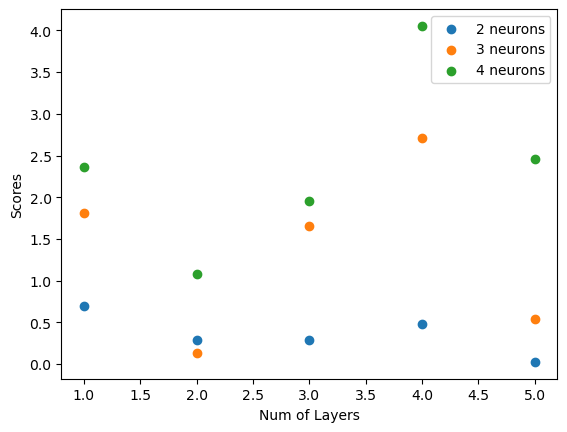

In [106]:
plt.figure()
plt.scatter(num_layers, scores_2, label='2 neurons')
plt.scatter(num_layers, scores_3, label='3 neurons')
plt.scatter(num_layers, scores_4, label='4 neurons')
plt.xlabel("Num of Layers")
plt.ylabel("Scores")
plt.legend()

In [113]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(4, activation='tanh'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 1s 715us/step - loss: 2.2249
Epoch 2/400
80/80 [==============================] - 0s 720us/step - loss: 1.5766
Epoch 3/400
80/80 [==============================] - 0s 673us/step - loss: 1.5675
Epoch 4/400
80/80 [==============================] - 0s 686us/step - loss: 1.5628
Epoch 5/400
80/80 [==============================] - 0s 666us/step - loss: 1.5580
Epoch 6/400
80/80 [==============================] - 0s 656us/step - loss: 1.5537
Epoch 7/400
80/80 [==============================] - 0s 690us/step - loss: 1.5498
Epoch 8/400
80/80 [==============================] - 0s 672us/step - loss: 1.5480
Epoch 9/400
80/80 [==============================] - 0s 632us/step - loss: 1.5441
Epoch 10/400
80/80 [==============================] - 0s 685us/step - loss: 1.5621
Epoch 11/400
80/80 [==============================] - 0s 704us/step - loss: 1.5404
Epoch 12/400
80/80 [==============================] - 0s 667us/step - loss: 1.5360
Epoch 13/400


80/80 [==============================] - 0s 654us/step - loss: 0.0978
Epoch 100/400
80/80 [==============================] - 0s 666us/step - loss: 0.0974
Epoch 101/400
80/80 [==============================] - 0s 627us/step - loss: 0.1003
Epoch 102/400
80/80 [==============================] - 0s 658us/step - loss: 0.0899
Epoch 103/400
80/80 [==============================] - 0s 626us/step - loss: 0.0946
Epoch 104/400
80/80 [==============================] - 0s 646us/step - loss: 0.0932
Epoch 105/400
80/80 [==============================] - 0s 622us/step - loss: 0.0894
Epoch 106/400
80/80 [==============================] - 0s 630us/step - loss: 0.0888
Epoch 107/400
80/80 [==============================] - 0s 700us/step - loss: 0.0878
Epoch 108/400
80/80 [==============================] - 0s 664us/step - loss: 0.0835
Epoch 109/400
80/80 [==============================] - 0s 662us/step - loss: 0.0823
Epoch 110/400
80/80 [==============================] - 0s 623us/step - loss: 0.0791
Epoch 

80/80 [==============================] - 0s 674us/step - loss: 1.9926
Epoch 197/400
80/80 [==============================] - 0s 667us/step - loss: 1.5538
Epoch 198/400
80/80 [==============================] - 0s 675us/step - loss: 1.0227
Epoch 199/400
80/80 [==============================] - 0s 654us/step - loss: 0.8036
Epoch 200/400
80/80 [==============================] - 0s 654us/step - loss: 0.6460
Epoch 201/400
80/80 [==============================] - 0s 664us/step - loss: 0.5824
Epoch 202/400
80/80 [==============================] - 0s 649us/step - loss: 0.5642
Epoch 203/400
80/80 [==============================] - 0s 623us/step - loss: 0.5086
Epoch 204/400
80/80 [==============================] - 0s 607us/step - loss: 0.4751
Epoch 205/400
80/80 [==============================] - 0s 643us/step - loss: 0.4700
Epoch 206/400
80/80 [==============================] - 0s 667us/step - loss: 0.4692
Epoch 207/400
80/80 [==============================] - 0s 728us/step - loss: 0.4665
Epoch 

80/80 [==============================] - 0s 672us/step - loss: 0.0402
Epoch 294/400
80/80 [==============================] - 0s 664us/step - loss: 0.0348
Epoch 295/400
80/80 [==============================] - 0s 690us/step - loss: 0.0378
Epoch 296/400
80/80 [==============================] - 0s 669us/step - loss: 0.0390
Epoch 297/400
80/80 [==============================] - 0s 660us/step - loss: 0.0337
Epoch 298/400
80/80 [==============================] - 0s 689us/step - loss: 0.0500
Epoch 299/400
80/80 [==============================] - 0s 663us/step - loss: 0.0391
Epoch 300/400
80/80 [==============================] - 0s 659us/step - loss: 0.0316
Epoch 301/400
80/80 [==============================] - 0s 674us/step - loss: 0.0563
Epoch 302/400
80/80 [==============================] - 0s 670us/step - loss: 0.0429
Epoch 303/400
80/80 [==============================] - 0s 668us/step - loss: 0.0343
Epoch 304/400
80/80 [==============================] - 0s 667us/step - loss: 0.0334
Epoch 

80/80 [==============================] - 0s 683us/step - loss: 0.0315
Epoch 391/400
80/80 [==============================] - 0s 686us/step - loss: 0.0360
Epoch 392/400
80/80 [==============================] - 0s 641us/step - loss: 0.0299
Epoch 393/400
80/80 [==============================] - 0s 680us/step - loss: 0.0471
Epoch 394/400
80/80 [==============================] - 0s 669us/step - loss: 0.0283
Epoch 395/400
80/80 [==============================] - 0s 682us/step - loss: 0.0313
Epoch 396/400
80/80 [==============================] - 0s 685us/step - loss: 0.0409
Epoch 397/400
80/80 [==============================] - 0s 679us/step - loss: 0.0290
Epoch 398/400
80/80 [==============================] - 0s 682us/step - loss: 0.0427
Epoch 399/400
80/80 [==============================] - 0s 670us/step - loss: 0.0420
Epoch 400/400
5/5 [==============================] - 0s 873us/step - loss: 0.0217


In [111]:
# relu comparison
model = Sequential()

model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 782us/step - loss: 7.7125
Epoch 2/400
80/80 [==============================] - 0s 712us/step - loss: 7.7125
Epoch 3/400
80/80 [==============================] - 0s 663us/step - loss: 7.7125
Epoch 4/400
80/80 [==============================] - 0s 670us/step - loss: 7.7125
Epoch 5/400
80/80 [==============================] - 0s 665us/step - loss: 7.7125
Epoch 6/400
80/80 [==============================] - 0s 674us/step - loss: 7.7125
Epoch 7/400
80/80 [==============================] - 0s 648us/step - loss: 7.7125
Epoch 8/400
80/80 [==============================] - 0s 674us/step - loss: 7.7125
Epoch 9/400
80/80 [==============================] - 0s 693us/step - loss: 7.7125
Epoch 10/400
80/80 [==============================] - 0s 671us/step - loss: 7.7125
Epoch 11/400
80/80 [==============================] - 0s 703us/step - loss: 7.7125
Epoch 12/400
80/80 [==============================] - 0s 619us/step - loss: 7.7125
Epoch 13/400


80/80 [==============================] - 0s 606us/step - loss: 7.7125
Epoch 100/400
80/80 [==============================] - 0s 654us/step - loss: 7.7125
Epoch 101/400
80/80 [==============================] - 0s 622us/step - loss: 7.7125
Epoch 102/400
80/80 [==============================] - 0s 617us/step - loss: 7.7125
Epoch 103/400
80/80 [==============================] - 0s 624us/step - loss: 7.7125
Epoch 104/400
80/80 [==============================] - 0s 611us/step - loss: 7.7125
Epoch 105/400
80/80 [==============================] - 0s 624us/step - loss: 7.7125
Epoch 106/400
80/80 [==============================] - 0s 613us/step - loss: 7.7125
Epoch 107/400
80/80 [==============================] - 0s 621us/step - loss: 7.7125
Epoch 108/400
80/80 [==============================] - 0s 622us/step - loss: 7.7125
Epoch 109/400
80/80 [==============================] - 0s 602us/step - loss: 7.7125
Epoch 110/400
80/80 [==============================] - 0s 609us/step - loss: 7.7125
Epoch 

80/80 [==============================] - 0s 567us/step - loss: 7.7125
Epoch 197/400
80/80 [==============================] - 0s 634us/step - loss: 7.7125
Epoch 198/400
80/80 [==============================] - 0s 627us/step - loss: 7.7125
Epoch 199/400
80/80 [==============================] - 0s 628us/step - loss: 7.7125
Epoch 200/400
80/80 [==============================] - 0s 599us/step - loss: 7.7125
Epoch 201/400
80/80 [==============================] - 0s 617us/step - loss: 7.7125
Epoch 202/400
80/80 [==============================] - 0s 608us/step - loss: 7.7125
Epoch 203/400
80/80 [==============================] - 0s 619us/step - loss: 7.7125
Epoch 204/400
80/80 [==============================] - 0s 613us/step - loss: 7.7125
Epoch 205/400
80/80 [==============================] - 0s 646us/step - loss: 7.7125
Epoch 206/400
80/80 [==============================] - 0s 649us/step - loss: 7.7125
Epoch 207/400
80/80 [==============================] - 0s 614us/step - loss: 7.7125
Epoch 

80/80 [==============================] - 0s 580us/step - loss: 7.7125
Epoch 294/400
80/80 [==============================] - 0s 622us/step - loss: 7.7125
Epoch 295/400
80/80 [==============================] - 0s 633us/step - loss: 7.7125
Epoch 296/400
80/80 [==============================] - 0s 629us/step - loss: 7.7125
Epoch 297/400
80/80 [==============================] - 0s 616us/step - loss: 7.7125
Epoch 298/400
80/80 [==============================] - 0s 610us/step - loss: 7.7125
Epoch 299/400
80/80 [==============================] - 0s 617us/step - loss: 7.7125
Epoch 300/400
80/80 [==============================] - 0s 613us/step - loss: 7.7125
Epoch 301/400
80/80 [==============================] - 0s 620us/step - loss: 7.7125
Epoch 302/400
80/80 [==============================] - 0s 623us/step - loss: 7.7125
Epoch 303/400
80/80 [==============================] - 0s 599us/step - loss: 7.7125
Epoch 304/400
80/80 [==============================] - 0s 625us/step - loss: 7.7125
Epoch 

80/80 [==============================] - 0s 628us/step - loss: 7.7125
Epoch 391/400
80/80 [==============================] - 0s 624us/step - loss: 7.7125
Epoch 392/400
80/80 [==============================] - 0s 626us/step - loss: 7.7125
Epoch 393/400
80/80 [==============================] - 0s 604us/step - loss: 7.7125
Epoch 394/400
80/80 [==============================] - 0s 626us/step - loss: 7.7125
Epoch 395/400
80/80 [==============================] - 0s 618us/step - loss: 7.7125
Epoch 396/400
80/80 [==============================] - 0s 561us/step - loss: 7.7125
Epoch 397/400
80/80 [==============================] - 0s 574us/step - loss: 7.7125
Epoch 398/400
80/80 [==============================] - 0s 574us/step - loss: 7.7125
Epoch 399/400
80/80 [==============================] - 0s 571us/step - loss: 7.7125
Epoch 400/400
5/5 [==============================] - 0s 907us/step - loss: 7.7125


In [112]:
# sigmoid comparison
model = Sequential()

model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 727us/step - loss: 0.6987
Epoch 2/400
80/80 [==============================] - 0s 725us/step - loss: 0.6962
Epoch 3/400
80/80 [==============================] - 0s 678us/step - loss: 0.6950
Epoch 4/400
80/80 [==============================] - 0s 701us/step - loss: 0.6948
Epoch 5/400
80/80 [==============================] - 0s 633us/step - loss: 0.6948
Epoch 6/400
80/80 [==============================] - 0s 677us/step - loss: 0.6947
Epoch 7/400
80/80 [==============================] - 0s 656us/step - loss: 0.6947
Epoch 8/400
80/80 [==============================] - 0s 668us/step - loss: 0.6943
Epoch 9/400
80/80 [==============================] - 0s 667us/step - loss: 0.6945
Epoch 10/400
80/80 [==============================] - 0s 667us/step - loss: 0.6946
Epoch 11/400
80/80 [==============================] - 0s 698us/step - loss: 0.6949
Epoch 12/400
80/80 [==============================] - 0s 668us/step - loss: 0.6946
Epoch 13/400


80/80 [==============================] - 0s 644us/step - loss: 0.6947
Epoch 100/400
80/80 [==============================] - 0s 661us/step - loss: 0.6943
Epoch 101/400
80/80 [==============================] - 0s 626us/step - loss: 0.6943
Epoch 102/400
80/80 [==============================] - 0s 619us/step - loss: 0.6946
Epoch 103/400
80/80 [==============================] - 0s 632us/step - loss: 0.6945
Epoch 104/400
80/80 [==============================] - 0s 644us/step - loss: 0.6946
Epoch 105/400
80/80 [==============================] - 0s 632us/step - loss: 0.6946
Epoch 106/400
80/80 [==============================] - 0s 622us/step - loss: 0.6945
Epoch 107/400
80/80 [==============================] - 0s 626us/step - loss: 0.6947
Epoch 108/400
80/80 [==============================] - 0s 627us/step - loss: 0.6944
Epoch 109/400
80/80 [==============================] - 0s 624us/step - loss: 0.6945
Epoch 110/400
80/80 [==============================] - 0s 629us/step - loss: 0.6947
Epoch 

80/80 [==============================] - 0s 629us/step - loss: 0.6943
Epoch 197/400
80/80 [==============================] - 0s 654us/step - loss: 0.6948
Epoch 198/400
80/80 [==============================] - 0s 649us/step - loss: 0.6946
Epoch 199/400
80/80 [==============================] - 0s 650us/step - loss: 0.6948
Epoch 200/400
80/80 [==============================] - 0s 632us/step - loss: 0.6945
Epoch 201/400
80/80 [==============================] - 0s 622us/step - loss: 0.6945
Epoch 202/400
80/80 [==============================] - 0s 631us/step - loss: 0.6946
Epoch 203/400
80/80 [==============================] - 0s 619us/step - loss: 0.6946
Epoch 204/400
80/80 [==============================] - 0s 626us/step - loss: 0.6942
Epoch 205/400
80/80 [==============================] - 0s 624us/step - loss: 0.6944
Epoch 206/400
80/80 [==============================] - 0s 653us/step - loss: 0.6946
Epoch 207/400
80/80 [==============================] - 0s 634us/step - loss: 0.6941
Epoch 

80/80 [==============================] - 0s 624us/step - loss: 0.6945
Epoch 294/400
80/80 [==============================] - 0s 650us/step - loss: 0.6944
Epoch 295/400
80/80 [==============================] - 0s 627us/step - loss: 0.6942
Epoch 296/400
80/80 [==============================] - 0s 632us/step - loss: 0.6948
Epoch 297/400
80/80 [==============================] - 0s 622us/step - loss: 0.6946
Epoch 298/400
80/80 [==============================] - 0s 622us/step - loss: 0.6945
Epoch 299/400
80/80 [==============================] - 0s 617us/step - loss: 0.6947
Epoch 300/400
80/80 [==============================] - 0s 621us/step - loss: 0.6943
Epoch 301/400
80/80 [==============================] - 0s 630us/step - loss: 0.6940
Epoch 302/400
80/80 [==============================] - 0s 632us/step - loss: 0.6947
Epoch 303/400
80/80 [==============================] - 0s 630us/step - loss: 0.6947
Epoch 304/400
80/80 [==============================] - 0s 645us/step - loss: 0.6941
Epoch 

80/80 [==============================] - 0s 632us/step - loss: 0.6948
Epoch 391/400
80/80 [==============================] - 0s 650us/step - loss: 0.6941
Epoch 392/400
80/80 [==============================] - 0s 631us/step - loss: 0.6946
Epoch 393/400
80/80 [==============================] - 0s 626us/step - loss: 0.6950
Epoch 394/400
80/80 [==============================] - 0s 627us/step - loss: 0.6949
Epoch 395/400
80/80 [==============================] - 0s 646us/step - loss: 0.6943
Epoch 396/400
80/80 [==============================] - 0s 651us/step - loss: 0.6948
Epoch 397/400
80/80 [==============================] - 0s 632us/step - loss: 0.6945
Epoch 398/400
80/80 [==============================] - 0s 634us/step - loss: 0.6948
Epoch 399/400
80/80 [==============================] - 0s 630us/step - loss: 0.6944
Epoch 400/400
5/5 [==============================] - 0s 890us/step - loss: 0.6932


In [115]:
print(model.predict(X).reshape(4*n))


ValueError: cannot reshape array of size 640 into shape (160,)

In [114]:
scores = model.evaluate(X, y)
scores, model.metrics_names

5/5 [==============================] - 0s 782us/step - loss: 0.0217


(0.021746572107076645, ['loss'])

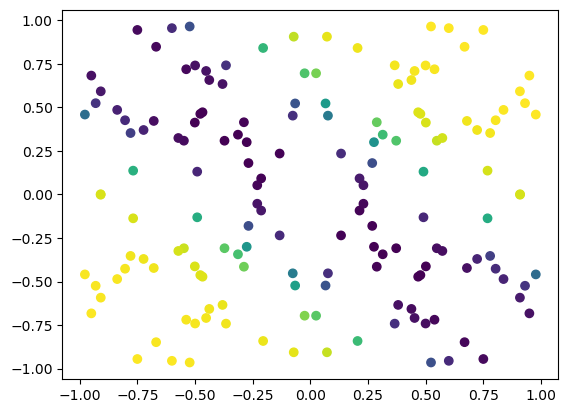

In [10]:
plt.scatter(*zip(*X), c=model.predict(X))

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [12]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [13]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [14]:
X, Y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0.,

In [15]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
77/77 [==============================] - 0s 820us/step - loss: 0.6626 - accuracy: 0.6406
Epoch 2/1000
77/77 [==============================] - 0s 797us/step - loss: 0.6437 - accuracy: 0.6523
Epoch 3/1000
77/77 [==============================] - 0s 745us/step - loss: 0.6322 - accuracy: 0.6497
Epoch 4/1000
77/77 [==============================] - 0s 767us/step - loss: 0.6198 - accuracy: 0.6484
Epoch 5/1000
77/77 [==============================] - 0s 786us/step - loss: 0.6114 - accuracy: 0.6523
Epoch 6/1000
77/77 [==============================] - 0s 828us/step - loss: 0.6048 - accuracy: 0.6510
Epoch 7/1000
77/77 [==============================] - 0s 824us/step - loss: 0.5966 - accuracy: 0.6576
Epoch 8/1000
77/77 [==============================] - 0s 814us/step - loss: 0.5907 - accuracy: 0.6732
Epoch 9/1000
77/77 [==============================] - 0s 843us/step - loss: 0.5854 - accuracy: 0.6732
Epoch 10/1000
77/77 [==============================] - 0s 821us/step - loss: 0.586

77/77 [==============================] - 0s 755us/step - loss: 0.5312 - accuracy: 0.7279
Epoch 81/1000
77/77 [==============================] - 0s 777us/step - loss: 0.5273 - accuracy: 0.7357
Epoch 82/1000
77/77 [==============================] - 0s 773us/step - loss: 0.5210 - accuracy: 0.7422
Epoch 83/1000
77/77 [==============================] - 0s 725us/step - loss: 0.5376 - accuracy: 0.7266
Epoch 84/1000
77/77 [==============================] - 0s 782us/step - loss: 0.5353 - accuracy: 0.7266
Epoch 85/1000
77/77 [==============================] - 0s 809us/step - loss: 0.5327 - accuracy: 0.7357
Epoch 86/1000
77/77 [==============================] - 0s 832us/step - loss: 0.5291 - accuracy: 0.7357
Epoch 87/1000
77/77 [==============================] - 0s 798us/step - loss: 0.5295 - accuracy: 0.7474
Epoch 88/1000
77/77 [==============================] - 0s 768us/step - loss: 0.5254 - accuracy: 0.7357
Epoch 89/1000
77/77 [==============================] - 0s 749us/step - loss: 0.5264 - a

77/77 [==============================] - 0s 756us/step - loss: 0.5105 - accuracy: 0.7409
Epoch 160/1000
77/77 [==============================] - 0s 766us/step - loss: 0.5158 - accuracy: 0.7539
Epoch 161/1000
77/77 [==============================] - 0s 748us/step - loss: 0.5127 - accuracy: 0.7461
Epoch 162/1000
77/77 [==============================] - 0s 719us/step - loss: 0.5096 - accuracy: 0.7526
Epoch 163/1000
77/77 [==============================] - 0s 702us/step - loss: 0.5137 - accuracy: 0.7474
Epoch 164/1000
77/77 [==============================] - 0s 734us/step - loss: 0.5158 - accuracy: 0.7461
Epoch 165/1000
77/77 [==============================] - 0s 766us/step - loss: 0.5099 - accuracy: 0.7487
Epoch 166/1000
77/77 [==============================] - 0s 741us/step - loss: 0.5079 - accuracy: 0.7461
Epoch 167/1000
77/77 [==============================] - 0s 711us/step - loss: 0.5147 - accuracy: 0.7422
Epoch 168/1000
77/77 [==============================] - 0s 745us/step - loss: 0

77/77 [==============================] - 0s 780us/step - loss: 0.4969 - accuracy: 0.7617
Epoch 238/1000
77/77 [==============================] - 0s 772us/step - loss: 0.4924 - accuracy: 0.7565
Epoch 239/1000
77/77 [==============================] - 0s 720us/step - loss: 0.5025 - accuracy: 0.7487
Epoch 240/1000
77/77 [==============================] - 0s 773us/step - loss: 0.4927 - accuracy: 0.7617
Epoch 241/1000
77/77 [==============================] - 0s 788us/step - loss: 0.5024 - accuracy: 0.7487
Epoch 242/1000
77/77 [==============================] - 0s 705us/step - loss: 0.4979 - accuracy: 0.7539
Epoch 243/1000
77/77 [==============================] - 0s 745us/step - loss: 0.4996 - accuracy: 0.7435
Epoch 244/1000
77/77 [==============================] - 0s 648us/step - loss: 0.4934 - accuracy: 0.7500
Epoch 245/1000
77/77 [==============================] - 0s 654us/step - loss: 0.4909 - accuracy: 0.7526
Epoch 246/1000
77/77 [==============================] - 0s 656us/step - loss: 0

77/77 [==============================] - 0s 777us/step - loss: 0.4793 - accuracy: 0.7747
Epoch 316/1000
77/77 [==============================] - 0s 763us/step - loss: 0.4802 - accuracy: 0.7708
Epoch 317/1000
77/77 [==============================] - 0s 742us/step - loss: 0.4794 - accuracy: 0.7669
Epoch 318/1000
77/77 [==============================] - 0s 682us/step - loss: 0.4747 - accuracy: 0.7708
Epoch 319/1000
77/77 [==============================] - 0s 730us/step - loss: 0.4793 - accuracy: 0.7708
Epoch 320/1000
77/77 [==============================] - 0s 716us/step - loss: 0.4790 - accuracy: 0.7734
Epoch 321/1000
77/77 [==============================] - 0s 719us/step - loss: 0.4822 - accuracy: 0.7643
Epoch 322/1000
77/77 [==============================] - 0s 746us/step - loss: 0.4742 - accuracy: 0.7760
Epoch 323/1000
77/77 [==============================] - 0s 725us/step - loss: 0.4796 - accuracy: 0.7786
Epoch 324/1000
77/77 [==============================] - 0s 717us/step - loss: 0

Epoch 394/1000
77/77 [==============================] - 0s 736us/step - loss: 0.4779 - accuracy: 0.7669
Epoch 395/1000
77/77 [==============================] - 0s 757us/step - loss: 0.4776 - accuracy: 0.7565
Epoch 396/1000
77/77 [==============================] - 0s 692us/step - loss: 0.4675 - accuracy: 0.7734
Epoch 397/1000
77/77 [==============================] - 0s 656us/step - loss: 0.4685 - accuracy: 0.7760
Epoch 398/1000
77/77 [==============================] - 0s 684us/step - loss: 0.4612 - accuracy: 0.7799
Epoch 399/1000
77/77 [==============================] - 0s 750us/step - loss: 0.4694 - accuracy: 0.7695
Epoch 400/1000
77/77 [==============================] - 0s 745us/step - loss: 0.4717 - accuracy: 0.7669
Epoch 401/1000
77/77 [==============================] - 0s 718us/step - loss: 0.4637 - accuracy: 0.7799
Epoch 402/1000
77/77 [==============================] - 0s 714us/step - loss: 0.4621 - accuracy: 0.7826
Epoch 403/1000
77/77 [==============================] - 0s 712us

77/77 [==============================] - 0s 711us/step - loss: 0.4752 - accuracy: 0.7695
Epoch 473/1000
77/77 [==============================] - 0s 831us/step - loss: 0.4550 - accuracy: 0.7812
Epoch 474/1000
77/77 [==============================] - 0s 722us/step - loss: 0.4681 - accuracy: 0.7760
Epoch 475/1000
77/77 [==============================] - 0s 743us/step - loss: 0.4714 - accuracy: 0.7669
Epoch 476/1000
77/77 [==============================] - 0s 776us/step - loss: 0.4579 - accuracy: 0.7865
Epoch 477/1000
77/77 [==============================] - 0s 815us/step - loss: 0.4563 - accuracy: 0.7708
Epoch 478/1000
77/77 [==============================] - 0s 798us/step - loss: 0.4628 - accuracy: 0.7812
Epoch 479/1000
77/77 [==============================] - 0s 778us/step - loss: 0.4603 - accuracy: 0.7695
Epoch 480/1000
77/77 [==============================] - 0s 710us/step - loss: 0.4561 - accuracy: 0.7878
Epoch 481/1000
77/77 [==============================] - 0s 718us/step - loss: 0

Epoch 551/1000
77/77 [==============================] - 0s 795us/step - loss: 0.4636 - accuracy: 0.7760
Epoch 552/1000
77/77 [==============================] - 0s 805us/step - loss: 0.4648 - accuracy: 0.7669
Epoch 553/1000
77/77 [==============================] - 0s 780us/step - loss: 0.4578 - accuracy: 0.7721
Epoch 554/1000
77/77 [==============================] - 0s 813us/step - loss: 0.4590 - accuracy: 0.7773
Epoch 555/1000
77/77 [==============================] - 0s 801us/step - loss: 0.4650 - accuracy: 0.7669
Epoch 556/1000
77/77 [==============================] - 0s 764us/step - loss: 0.4569 - accuracy: 0.7773
Epoch 557/1000
77/77 [==============================] - 0s 765us/step - loss: 0.4617 - accuracy: 0.7669
Epoch 558/1000
77/77 [==============================] - 0s 710us/step - loss: 0.4596 - accuracy: 0.7826
Epoch 559/1000
77/77 [==============================] - 0s 751us/step - loss: 0.4676 - accuracy: 0.7799
Epoch 560/1000
77/77 [==============================] - 0s 748us

77/77 [==============================] - 0s 784us/step - loss: 0.4616 - accuracy: 0.7669
Epoch 630/1000
77/77 [==============================] - 0s 778us/step - loss: 0.4587 - accuracy: 0.7682
Epoch 631/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4502 - accuracy: 0.7786
Epoch 632/1000
77/77 [==============================] - 0s 762us/step - loss: 0.4474 - accuracy: 0.7852
Epoch 633/1000
77/77 [==============================] - 0s 780us/step - loss: 0.4499 - accuracy: 0.7878
Epoch 634/1000
77/77 [==============================] - 0s 713us/step - loss: 0.4476 - accuracy: 0.7839
Epoch 635/1000
77/77 [==============================] - 0s 749us/step - loss: 0.4563 - accuracy: 0.7812
Epoch 636/1000
77/77 [==============================] - 0s 715us/step - loss: 0.4460 - accuracy: 0.7812
Epoch 637/1000
77/77 [==============================] - 0s 704us/step - loss: 0.4446 - accuracy: 0.7826
Epoch 638/1000
77/77 [==============================] - 0s 748us/step - loss: 0

77/77 [==============================] - 0s 761us/step - loss: 0.4394 - accuracy: 0.7891
Epoch 708/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4431 - accuracy: 0.7812
Epoch 709/1000
77/77 [==============================] - 0s 769us/step - loss: 0.4438 - accuracy: 0.7878
Epoch 710/1000
77/77 [==============================] - 0s 742us/step - loss: 0.4448 - accuracy: 0.7799
Epoch 711/1000
77/77 [==============================] - 0s 738us/step - loss: 0.4448 - accuracy: 0.7839
Epoch 712/1000
77/77 [==============================] - 0s 725us/step - loss: 0.4497 - accuracy: 0.7695
Epoch 713/1000
77/77 [==============================] - 0s 736us/step - loss: 0.4488 - accuracy: 0.7799
Epoch 714/1000
77/77 [==============================] - 0s 745us/step - loss: 0.4426 - accuracy: 0.7865
Epoch 715/1000
77/77 [==============================] - 0s 782us/step - loss: 0.4527 - accuracy: 0.7812
Epoch 716/1000
77/77 [==============================] - 0s 758us/step - loss: 0

77/77 [==============================] - 0s 705us/step - loss: 0.4373 - accuracy: 0.7852
Epoch 786/1000
77/77 [==============================] - 0s 792us/step - loss: 0.4553 - accuracy: 0.7773
Epoch 787/1000
77/77 [==============================] - 0s 703us/step - loss: 0.4428 - accuracy: 0.8008
Epoch 788/1000
77/77 [==============================] - 0s 753us/step - loss: 0.4367 - accuracy: 0.7852
Epoch 789/1000
77/77 [==============================] - 0s 704us/step - loss: 0.4479 - accuracy: 0.7747
Epoch 790/1000
77/77 [==============================] - 0s 694us/step - loss: 0.4384 - accuracy: 0.7878
Epoch 791/1000
77/77 [==============================] - 0s 731us/step - loss: 0.4576 - accuracy: 0.7721
Epoch 792/1000
77/77 [==============================] - 0s 763us/step - loss: 0.4493 - accuracy: 0.7799
Epoch 793/1000
77/77 [==============================] - 0s 711us/step - loss: 0.4503 - accuracy: 0.7826
Epoch 794/1000
77/77 [==============================] - 0s 724us/step - loss: 0

77/77 [==============================] - 0s 786us/step - loss: 0.4431 - accuracy: 0.7799
Epoch 864/1000
77/77 [==============================] - 0s 741us/step - loss: 0.4367 - accuracy: 0.7747
Epoch 865/1000
77/77 [==============================] - 0s 710us/step - loss: 0.4368 - accuracy: 0.7891
Epoch 866/1000
77/77 [==============================] - 0s 733us/step - loss: 0.4409 - accuracy: 0.7904
Epoch 867/1000
77/77 [==============================] - 0s 729us/step - loss: 0.4413 - accuracy: 0.7930
Epoch 868/1000
77/77 [==============================] - 0s 785us/step - loss: 0.4377 - accuracy: 0.7865
Epoch 869/1000
77/77 [==============================] - 0s 744us/step - loss: 0.4368 - accuracy: 0.7839
Epoch 870/1000
77/77 [==============================] - 0s 736us/step - loss: 0.4326 - accuracy: 0.7878
Epoch 871/1000
77/77 [==============================] - 0s 830us/step - loss: 0.4361 - accuracy: 0.7852
Epoch 872/1000
77/77 [==============================] - 0s 765us/step - loss: 0

77/77 [==============================] - 0s 785us/step - loss: 0.4269 - accuracy: 0.7852
Epoch 942/1000
77/77 [==============================] - 0s 764us/step - loss: 0.4378 - accuracy: 0.7839
Epoch 943/1000
77/77 [==============================] - 0s 761us/step - loss: 0.4267 - accuracy: 0.7982
Epoch 944/1000
77/77 [==============================] - 0s 804us/step - loss: 0.4291 - accuracy: 0.7891
Epoch 945/1000
77/77 [==============================] - 0s 726us/step - loss: 0.4307 - accuracy: 0.7799
Epoch 946/1000
77/77 [==============================] - 0s 864us/step - loss: 0.4355 - accuracy: 0.7786
Epoch 947/1000
77/77 [==============================] - 0s 823us/step - loss: 0.4222 - accuracy: 0.7917
Epoch 948/1000
77/77 [==============================] - 0s 751us/step - loss: 0.4231 - accuracy: 0.7956
Epoch 949/1000
77/77 [==============================] - 0s 810us/step - loss: 0.4202 - accuracy: 0.7904
Epoch 950/1000
77/77 [==============================] - 0s 743us/step - loss: 0

In [17]:
scores = model.evaluate(X, Y)
scores, model.metrics_names

24/24 [==============================] - 0s 675us/step - loss: 0.4169 - accuracy: 0.7943


([0.41691818833351135, 0.7942708134651184], ['loss', 'accuracy'])

In [18]:
plt.scatter(*zip(*X), c=model.predict(X))

TypeError: scatter() got multiple values for argument 'c'

ValueError: x and y must be the same size

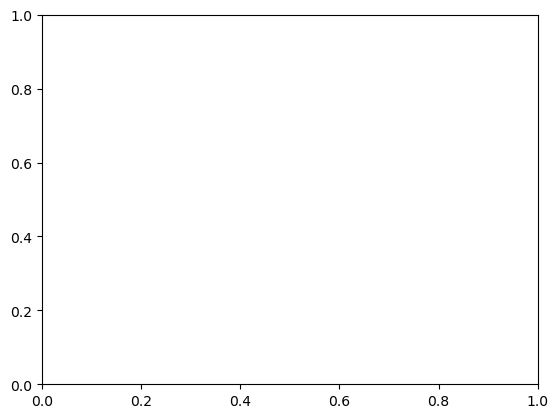

In [85]:
plt.scatter(model.predict(X), Y)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [21]:
import pandas as pd

beans = pd.read_excel('Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx')

beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [22]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [23]:
beans_copy = beans.copy()

enc.fit(beans_copy[["Class"]])
enc.categories_

[array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
       dtype=object)]

In [24]:
beans_copy["Class"] = enc.fit_transform(beans_copy[["Class"]])
beans_copy.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5.0


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(beans_copy.drop(['Class'], axis = 1), beans_copy.Class, test_size=.25)
#beans.shape, train.shape, test.shape
x_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
5933,48343,895.913,383.717555,160.726471,2.387395,0.908048,48920,248.097197,0.613412,0.988205,0.756853,0.646562,0.007937,0.000856,0.418042,0.998032
6092,50278,882.900,361.958692,178.624333,2.026368,0.869749,50965,253.013711,0.757610,0.986520,0.810522,0.699013,0.007199,0.001060,0.488619,0.990121
1606,43655,762.040,259.587723,214.297924,1.211340,0.564356,44077,235.761049,0.782236,0.990426,0.944688,0.908213,0.005946,0.002496,0.824852,0.999176
3685,181020,1593.456,594.896210,388.803196,1.530070,0.756871,182766,480.085224,0.784146,0.990447,0.895893,0.807007,0.003286,0.000860,0.651260,0.996473
8399,43022,788.250,292.156482,188.717299,1.548117,0.763383,43500,234.045533,0.703089,0.989011,0.870107,0.801096,0.006791,0.001725,0.641756,0.993513


In [26]:
x_train.shape

(10208, 16)

In [63]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=16, activation='tanh'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, epochs=100, batch_size=10)
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
1021/1021 [==============================] - 1s 794us/step - loss: -32.0253 - accuracy: 0.0390
Epoch 2/100
1021/1021 [==============================] - 1s 770us/step - loss: -38.6995 - accuracy: 0.0390
Epoch 3/100
1021/1021 [==============================] - 1s 780us/step - loss: -38.6995 - accuracy: 0.0390
Epoch 4/100
1021/1021 [==============================] - 1s 786us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 5/100
1021/1021 [==============================] - 1s 790us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 6/100
1021/1021 [==============================] - 1s 771us/step - loss: -38.6995 - accuracy: 0.0390
Epoch 7/100
1021/1021 [==============================] - 1s 781us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 8/100
1021/1021 [==============================] - 1s 804us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 9/100
1021/1021 [==============================] - 1s 773us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 10/100
1021/1021 [=============

Epoch 77/100
1021/1021 [==============================] - 1s 757us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 78/100
1021/1021 [==============================] - 1s 762us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 79/100
1021/1021 [==============================] - 1s 757us/step - loss: -38.6995 - accuracy: 0.0390
Epoch 80/100
1021/1021 [==============================] - 1s 761us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 81/100
1021/1021 [==============================] - 1s 760us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 82/100
1021/1021 [==============================] - 1s 768us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 83/100
1021/1021 [==============================] - 1s 789us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 84/100
1021/1021 [==============================] - 1s 789us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 85/100
1021/1021 [==============================] - 1s 774us/step - loss: -38.6996 - accuracy: 0.0390
Epoch 86/100
1021/1021 [====

In [36]:
#random forest approach
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy')

In [37]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [38]:
predictions = model.predict(x_train)

In [40]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [41]:
accuracy_score(y_train, predictions)

0.9998040752351097

In [48]:
confusion_matrix(y_train, predictions)

array([[ 977,    0,    0,    0,    0,    0,    0],
       [   0,  398,    0,    0,    0,    0,    0],
       [   0,    0, 1217,    0,    0,    0,    0],
       [   0,    0,    0, 2676,    0,    0,    0],
       [   0,    0,    0,    0, 1426,    0,    0],
       [   0,    0,    0,    0,    0, 1534,    0],
       [   0,    0,    0,    2,    0,    0, 1978]])

In [49]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       977
         1.0       1.00      1.00      1.00       398
         2.0       1.00      1.00      1.00      1217
         3.0       1.00      1.00      1.00      2676
         4.0       1.00      1.00      1.00      1426
         5.0       1.00      1.00      1.00      1534
         6.0       1.00      1.00      1.00      1980

    accuracy                           1.00     10208
   macro avg       1.00      1.00      1.00     10208
weighted avg       1.00      1.00      1.00     10208



In [44]:
test_predictions = model.predict(x_test)

In [45]:
accuracy_score(y_test, test_predictions)

0.9250661181310609

In [46]:
confusion_matrix(y_test, test_predictions)

array([[323,   0,  13,   0,   2,   0,   7],
       [  0, 124,   0,   0,   0,   0,   0],
       [  9,   0, 390,   0,   5,   1,   8],
       [  0,   0,   0, 813,   0,  12,  45],
       [  3,   0,   7,   3, 477,   0,  12],
       [  5,   0,   0,  17,   0, 457,  14],
       [  5,   0,   1,  71,  12,   3, 564]])

In [47]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       345
         1.0       1.00      1.00      1.00       124
         2.0       0.95      0.94      0.95       413
         3.0       0.90      0.93      0.92       870
         4.0       0.96      0.95      0.96       502
         5.0       0.97      0.93      0.95       493
         6.0       0.87      0.86      0.86       656

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403

